## Prediction of Car Selling Prices with Linear Regression

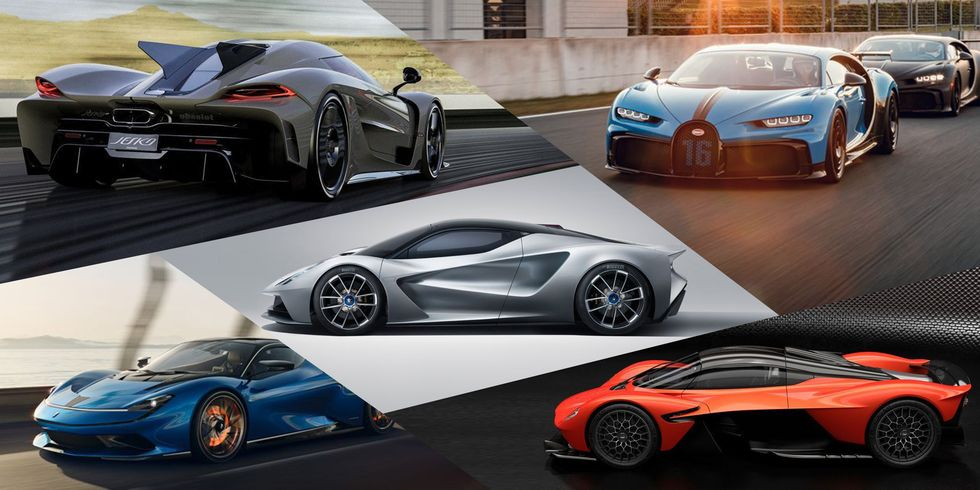

#### What is linear regression used for?
Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

#### Problem Statement

In order to recognize the factors affecting the selling price of cars, we need to understand:
- I) Which variables are influential in predicting the selling price of a car
- II) How nicely variables describe the selling price of a car

In this regard, we're required to model the selling price of cars with the available independent variables.

🙋‍♀️Eventually, as an example for testing the accuracy of the linear regression model in this notebook, we should be predicting the selling price of a car based on various features, which are explained below:
- Age = 10 years
- Present price = 11.23
- Kms Driven = 42000
- Fuel Type = Petrol
- Seller Type = Dealer
- Transmission = Manual
- Owner = 1
- Selling price =❓

# ▶️Step 1) Reading and Understanding the Data

In [1]:
# Supress warnings
import warnings
warnings.simplefilter(action = 'ignore')

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**1) Importing data using the pandas library**

In [3]:
data = pd.read_csv(r"C:\Users\dell\Downloads\Car Price Prediction Analysis\car data.csv")

In [4]:
df = pd.DataFrame(data)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**2) Understanding the structure of the data**

In [5]:
df.shape
# Data has 9 columns and 301 rows.

(301, 9)

In [6]:
df.describe()
# Describing the numerical variables

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df_categorical_variables = pd.DataFrame (data, columns= ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'])
df_categorical_variables.describe()
# Describing the categorical variables

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# ▶️Step 2) Data Cleaning and Preparation

In [9]:
# Deleting the "Car_Name" feature because, in the real world, the price of the car is not predicted based on the car's name
df1 = df.drop("Car_Name", axis= 1)

In [10]:
# Checking duplicates
df1.loc[df1.duplicated()]
# Two duplicate values were found

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [11]:
# Drop the duplicate values from the dataset
df2 = df1.drop_duplicates(keep='first')

In [12]:
df2.shape
# Data has 8 columns and 299 (301-2) rows.

(299, 8)

In [13]:
# Checking Null values
df2.isnull().sum()*100/df2.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [14]:
# Calculate the "Age" of cars from the "Year" feature
latest_year = df2.Year.max() + 1
latest_year

2019

In [15]:
df2["Age"] = latest_year - df2["Year"]
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,5


In [16]:
# Changing columns order
change_column_order = ['Year','Age','Selling_Price','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
df3 = df2.reindex(columns = change_column_order)
df3.head()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


# ▶️Step 3) Exploratory Data Analysis (EDA) 

**1) Numerical Univariate Analysis**

#### 🎯Target Variable: 💲Selling price

In [17]:
df3.Selling_Price.describe()

count    299.000000
mean       4.589632
std        4.984240
min        0.100000
25%        0.850000
50%        3.510000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

In [18]:
Selling_Price_mean_median = df3.Selling_Price.mean() - df3.Selling_Price.median()
print (Selling_Price_mean_median*1000,"$")

1079.6321070234117 $


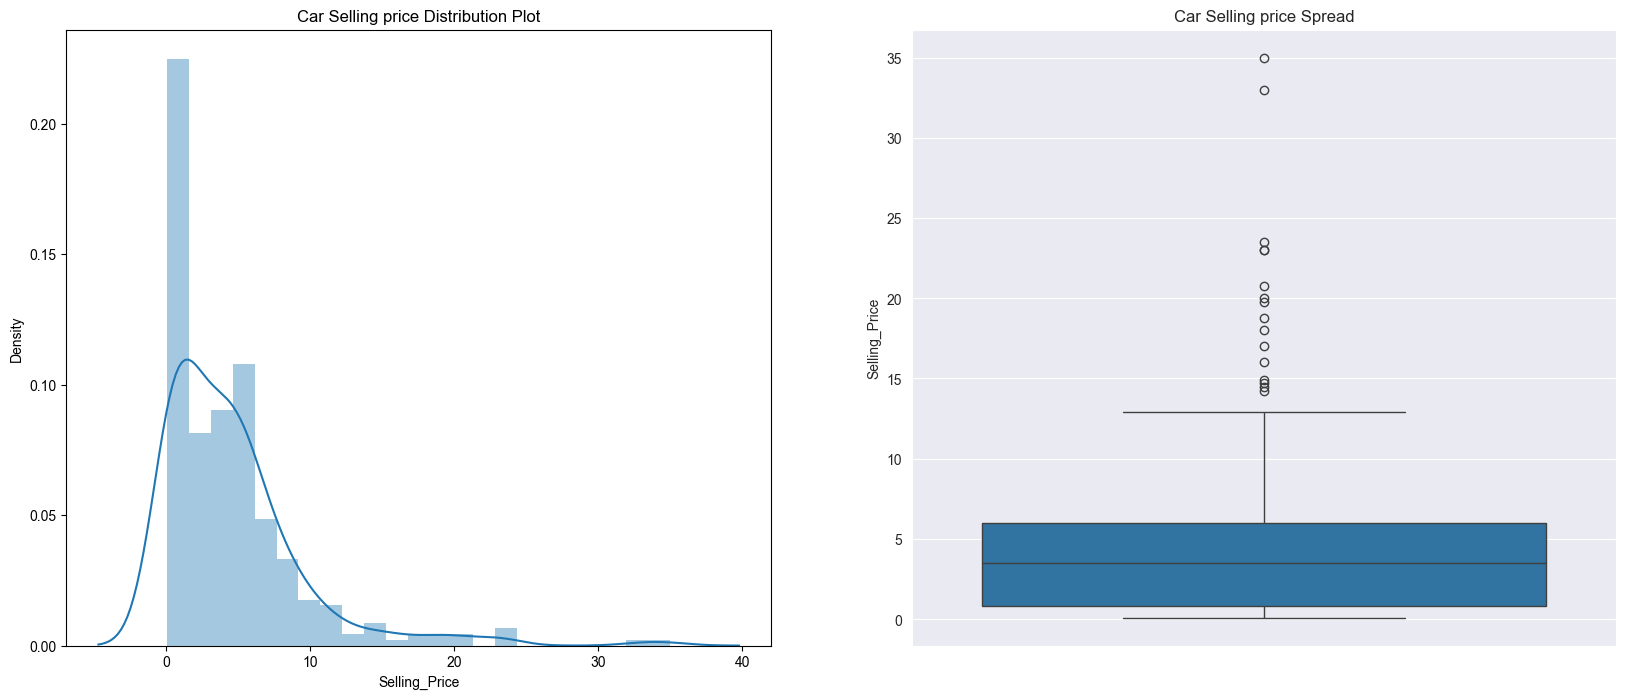

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Selling price Distribution Plot')
sns.distplot(df3.Selling_Price)
sns.set_style('darkgrid')

plt.subplot(1,2,2)
plt.title('Car Selling price Spread')
sns.boxplot(y=df3.Selling_Price)
sns.set_style('darkgrid')

plt.show()

#### Inference:
- Most selling prices in the dataset are below 6 thousand bucks.
- There is a difference of 1079.6 bucks between the mean and median of the selling price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car selling prices. (75% of the selling prices are below 6 thousand bucks, whereas the remaining 25% are between 6 and 35 thousand bucks)

#### 📅Variables: Year (year of the car bought ) & Age (age of the car)

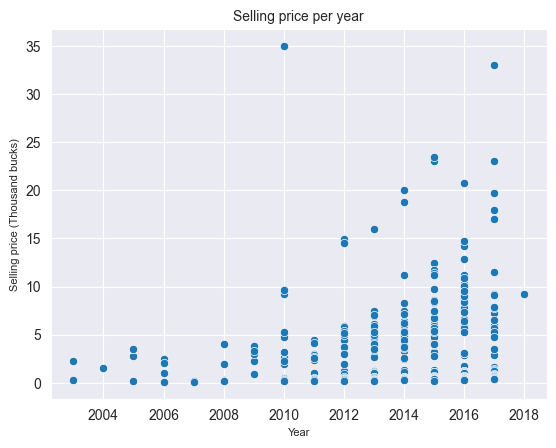

In [20]:
# plotting the target-year scatter graph
sns.scatterplot(data=df3, x="Year", y="Selling_Price")
sns.set_style('darkgrid')
plt.title("Selling price per year", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Year", size=8)
plt.show()

#### Inference:
- The most expensive car was bought in 2010 for 35 thousand bucks.

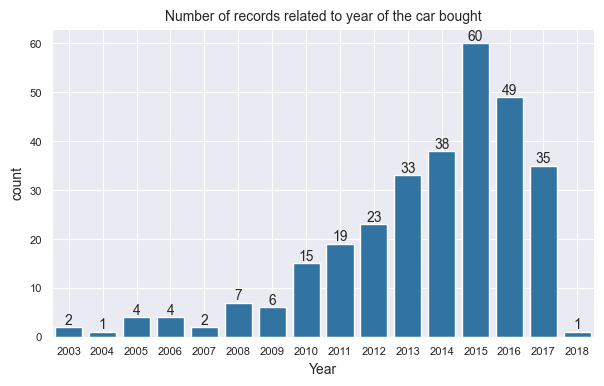

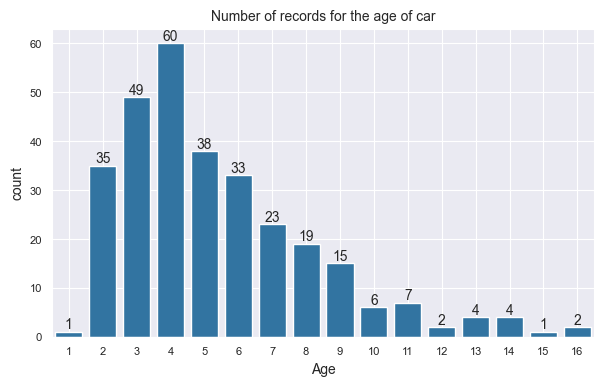

In [21]:
# Number of records related to year of the car bought
plt.figure(figsize = (7, 4))
ax=sns.countplot(data=df3, x=df3.Year)
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.title('Number of records related to year of the car bought', size=10)
plt.yticks(size=8)
plt.xticks(size=8)
plt.grid(linestyle='-')

# Number of records for the age of car
plt.figure(figsize = (7, 4))
ax=sns.countplot(data=df3, x=df3.Age)
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.title('Number of records for the age of car', size=10)
plt.yticks(size=8)
plt.xticks(size=8)
plt.grid(linestyle='-')
plt.show()

#### Inference:
- Most of the data records are for the cars bought in 2015 (3 years of age).

#### 💰Variable: Present price (previous purchase price)

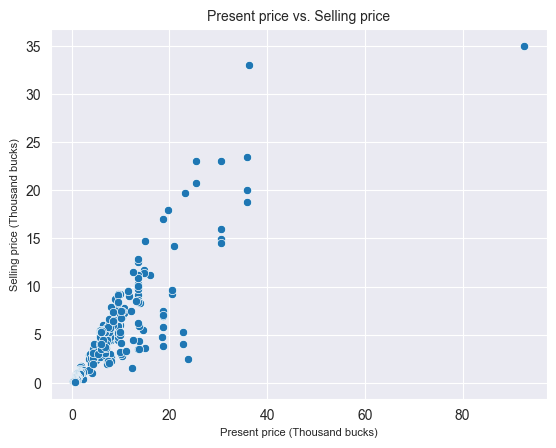

In [22]:
# plotting the target-present price scatter graph
sns.scatterplot(data=df3, x="Present_Price", y="Selling_Price")
sns.set_style('darkgrid')
plt.title("Present price vs. Selling price", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Present price (Thousand bucks)", size=8)
plt.show()

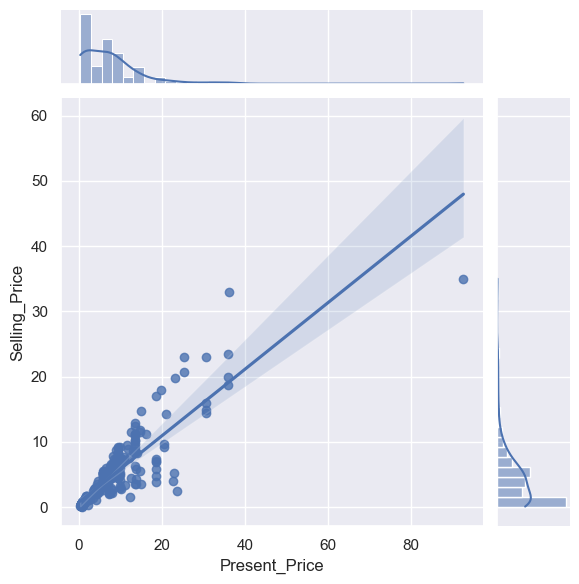

In [23]:
sns.set_theme(style="darkgrid")
sns.jointplot(x="Present_Price", y="Selling_Price", data=df3, kind="reg")
plt.show()

#### Inference:
- As the present price values increases, the selling price values increase

#### Possible noise existence:
- Selling price > 30 & Present price > 80
#### ✔️Investigating the possible noise

In [24]:
# Finding the Intended index
df3[(df3.Selling_Price>30)&(df3.Present_Price>80)].index

Index([86], dtype='int64')

In [25]:
df.iloc[[86]]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [26]:
# Calculate the "Present_Price" of cars compared to the "Selling_Price"
df3["Proportion_S_P_Price"] = df3["Present_Price"] / df3["Selling_Price"]

In [27]:
df3.Proportion_S_P_Price.nlargest(10)

85     9.492000
77     8.233333
200    7.500000
37     6.514286
94     5.695000
90     4.897368
199    4.833333
78     4.348571
55     4.177778
47     3.952381
Name: Proportion_S_P_Price, dtype: float64

- 👍The (Selling price > 30, Present price > 80) index is not noise because there is a greater "Present Price/Selling Price" ratio in the dataset.

In [28]:
# Deleting the "Proportion_S_P_Price"
df3 = df3.drop("Proportion_S_P_Price", axis= 1)

In [29]:
df3.Present_Price.describe()

count    299.000000
mean       7.541037
std        8.567887
min        0.320000
25%        1.200000
50%        6.100000
75%        9.840000
max       92.600000
Name: Present_Price, dtype: float64

In [30]:
Present_Price_mean_median = df3.Present_Price.mean() - df3.Present_Price.median()
print (Present_Price_mean_median*1000,"$")

1441.0367892976587 $


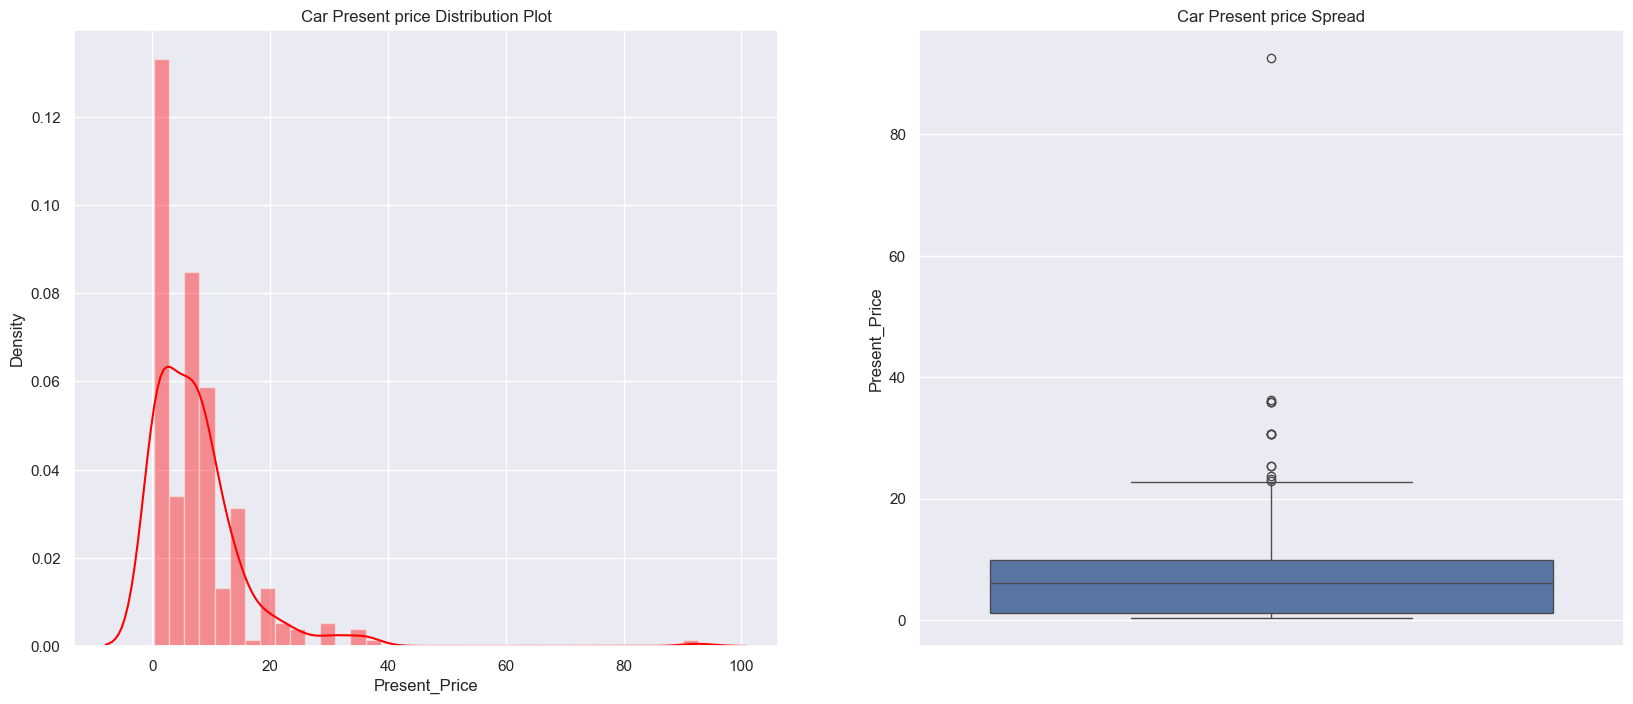

In [31]:
# Distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Present price Distribution Plot')
sns.distplot(df3.Present_Price, color='red')
# Spread
plt.subplot(1,2,2)
plt.title('Car Present price Spread')
sns.boxplot(y=df3.Present_Price)

plt.show()

#### Inference:
- Most present prices in the dataset are below 10 thousand bucks.
- There is a difference of 1441 bucks between the mean and median of the present price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car present prices. (75% of the present prices are below 9.84 thousand bucks, whereas the remaining 25% are between 9.84 and 92.6 thousand bucks)

#### 🔢Variable: Kms Driven (Number of kilometers the car is driven)

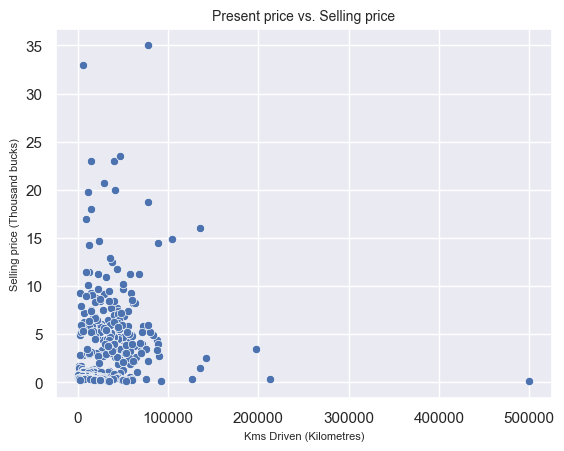

In [32]:
# Plotting the target-Kms driven scatter graph
sns.scatterplot(data=df3, x="Kms_Driven", y="Selling_Price")
sns.set_style('darkgrid')
plt.title("Present price vs. Selling price", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Kms Driven (Kilometres)", size=8)
plt.show()

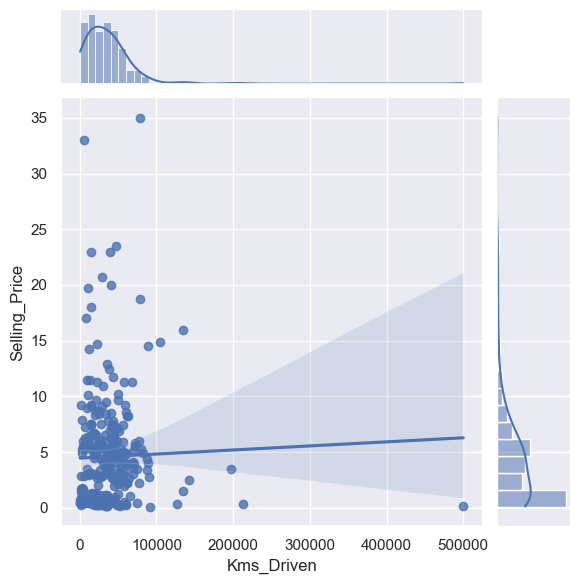

In [33]:
sns.set_theme(style="darkgrid")
sns.jointplot(x="Kms_Driven", y="Selling_Price", data=df3, kind="reg")
plt.show()

In [34]:
np.corrcoef(df3.Kms_Driven, df3.Selling_Price)

array([[1.        , 0.02856559],
       [0.02856559, 1.        ]])

#### Inference:
- There is not a significant correlation between the 'Kms Driven' and 'Selling price' based on the obtained correlation value, which is close to zero (0.028).

#### Possible noise existence:
- Selling price < 5 & Kms Driven > 400000
#### ✔️Investigating the possible noise

In [35]:
# Finding the Intended index
df3[(df3.Selling_Price<5)&(df3.Kms_Driven>400000)].index

Index([196], dtype='int64')

In [36]:
df[df["Car_Name"] == "Activa 3g"]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
165,Activa 3g,2016,0.45,0.54,500,Petrol,Individual,Automatic,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


👍Comparing the features of the two cases above (165 & 196 Indexes) shows that (Selling price < 5 & Kms Driven > 400000) cannot be noise except concerning the 'present price' feature.

In [37]:
df3.Kms_Driven.describe()

count       299.000000
mean      36916.752508
std       39015.170352
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48883.500000
max      500000.000000
Name: Kms_Driven, dtype: float64

In [38]:
Kms_Driven_mean_median = df3.Kms_Driven.mean() - df3.Kms_Driven.median()
print (Kms_Driven_mean_median,"Kms")

4916.752508361205 Kms


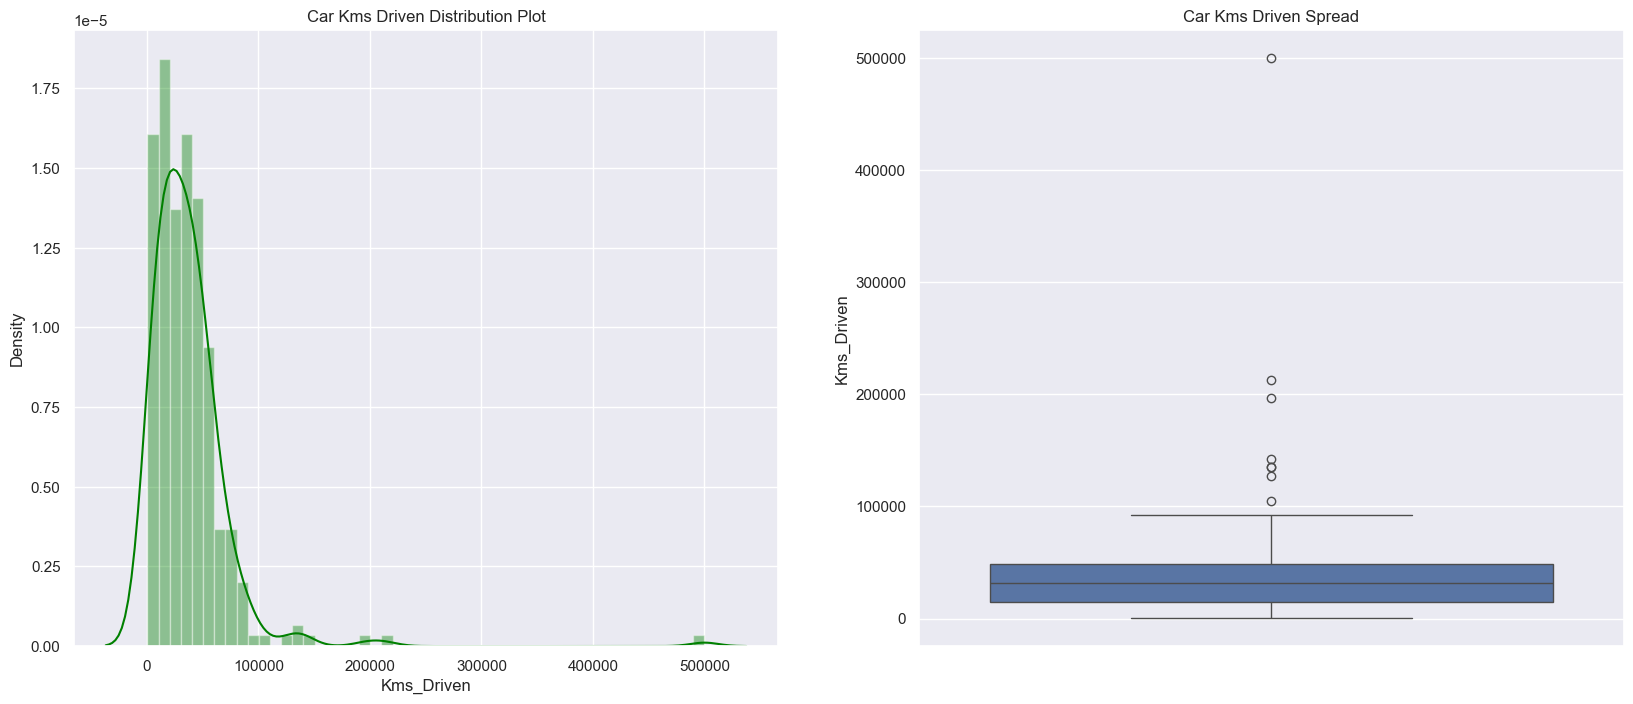

In [39]:
#Distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Kms Driven Distribution Plot')
sns.distplot(df3.Kms_Driven, color='green')

#Spread
plt.subplot(1,2,2)
plt.title('Car Kms Driven Spread')
sns.boxplot(y=df3.Kms_Driven)

plt.show()

#### Inference:
- Most Kms Driven in the dataset are below 60000 Kms.
- There is a difference of 4916.75 Kms between the mean and median of the Kms Driven distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car Kms Driven. (75% of the Kms Driven are below 48883.5 Kms, whereas the remaining 25% are between 48883.5 and 500000 Kms)

#### 🤵Variable: Owner (Number of previous owners of the car)

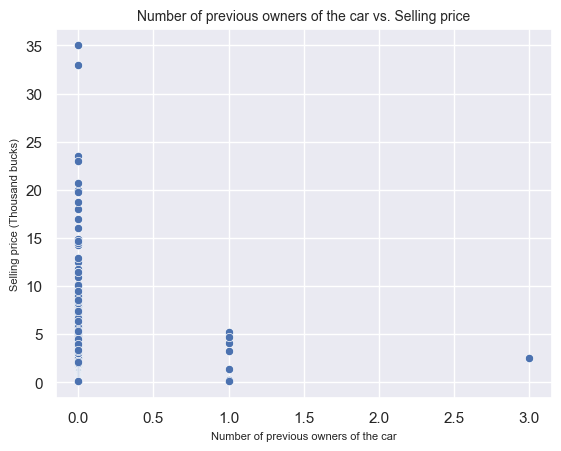

In [40]:
# plotting the target-Owner scatter graph
sns.scatterplot(data=df3, x="Owner", y="Selling_Price")
sns.set_style('darkgrid')
plt.title("Number of previous owners of the car vs. Selling price", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Number of previous owners of the car", size=8)
plt.show()

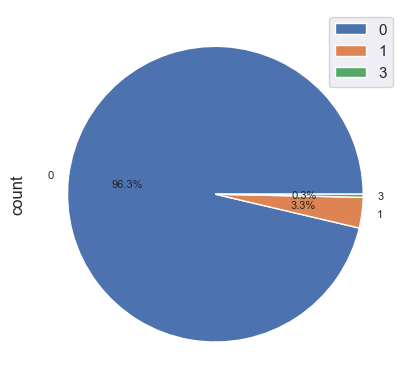

In [41]:
df_sym = pd.DataFrame(df3['Owner'].value_counts())
df_sym.plot.pie(subplots=True, labels = df_sym.index.values, autopct='%1.1f%%', fontsize=8)
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()

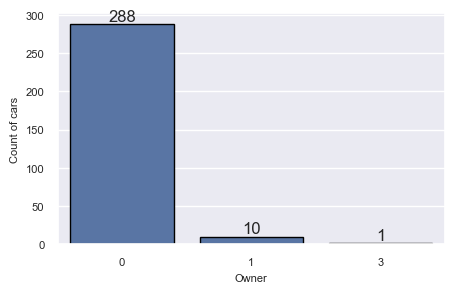

In [42]:
# Count of cars by the number of previous owners
plt.figure(figsize = (5, 3))
ax=sns.countplot(data=df3, x=df3.Owner, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel('Count of cars', size=8)
plt.yticks(size=8)
plt.xlabel('Owner', size=8)
plt.xticks(size=8)
plt.show()

In [43]:
df[df["Owner"] == 3]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


In [44]:
df[df["Owner"] == 1]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
58,etios g,2014,4.10,6.80,39485,Petrol,Dealer,Manual,1
106,Hyosung GT250R,2014,1.35,3.45,16500,Petrol,Individual,Manual,1
184,Bajaj Pulsar 150,2008,0.25,0.75,26000,Petrol,Individual,Manual,1
191,Bajaj Discover 125,2012,0.20,0.57,25000,Petrol,Individual,Manual,1
192,Hero Hunk,2007,0.20,0.75,49000,Petrol,Individual,Manual,1
193,Hero Ignitor Disc,2013,0.20,0.65,24000,Petrol,Individual,Manual,1
198,Bajaj Discover 125,2011,0.15,0.57,35000,Petrol,Individual,Manual,1
201,i20,2010,3.25,6.79,58000,Diesel,Dealer,Manual,1
205,grand i10,2016,5.25,5.70,3493,Petrol,Dealer,Manual,1
241,xcent,2015,4.75,7.13,35866,Petrol,Dealer,Manual,1


**2) Categorical Univariate Analysis**

#### ⛽Variable: Fuel Type (Petrol/Diesel/CNG)

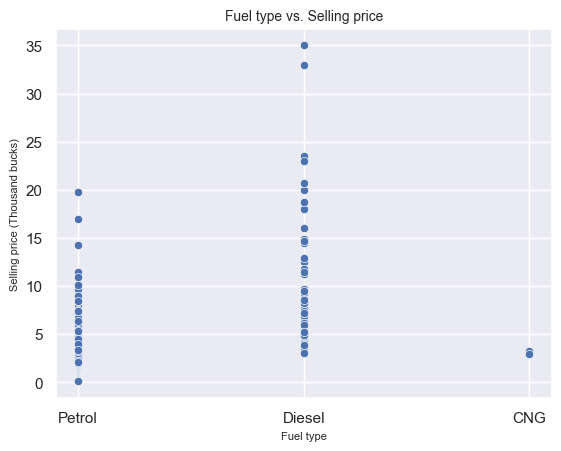

In [45]:
# plotting the target-Fuel type scatter graph
sns.scatterplot(data=df3, x="Fuel_Type", y="Selling_Price")
sns.set_style('darkgrid')
plt.title("Fuel type vs. Selling price", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Fuel type", size=8)
plt.show()

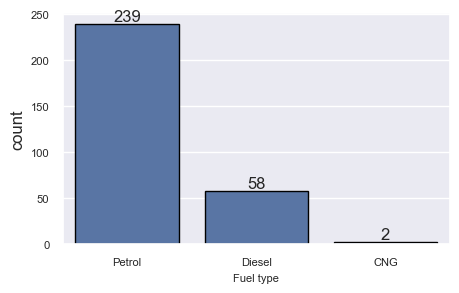

In [46]:
# Count of cars by fuel type
plt.figure(figsize = (5, 3))
ax=sns.countplot(data=df3, x=df3.Fuel_Type, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.yticks(size=8)
plt.xlabel('Fuel type', size=8)
plt.xticks(size=8)
plt.show()

In [47]:
df[df["Fuel_Type"] == "CNG"]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
18,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual,0
35,sx4,2011,2.95,7.74,49998,CNG,Dealer,Manual,0


#### 🤝Variable: Seller type (Individual/Dealer)

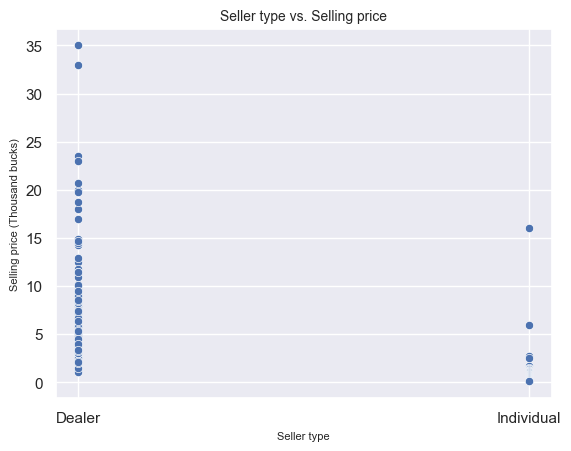

In [48]:
# plotting the target-Fuel type scatter graph
sns.scatterplot(data=df3, x="Seller_Type", y="Selling_Price")
sns.set_style('darkgrid')
plt.title("Seller type vs. Selling price", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Seller type", size=8)
plt.show()

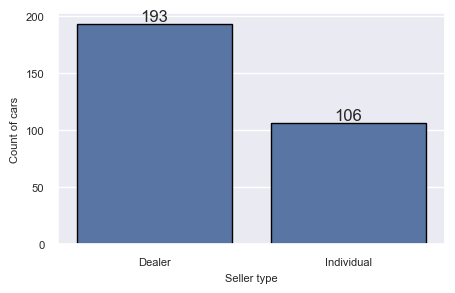

In [49]:
# Count of cars by Seller type
plt.figure(figsize = (5, 3))
ax=sns.countplot(data=df3, x=df3.Seller_Type, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel('Count of cars', size=8)
plt.yticks(size=8)
plt.xlabel('Seller type', size=8)
plt.xticks(size=8)
plt.show()

#### ⚙️Variable: Transmission (Automatic/Manual)

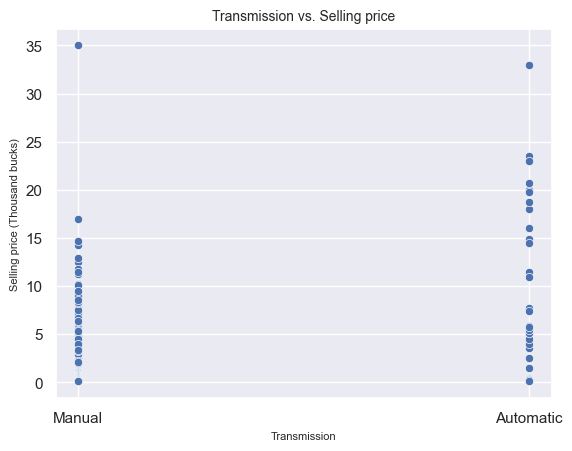

In [50]:
# plotting the target-Fuel type scatter graph
sns.scatterplot(data=df3, x="Transmission", y="Selling_Price")
sns.set_style('darkgrid')
plt.title("Transmission vs. Selling price", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Transmission", size=8)
plt.show()

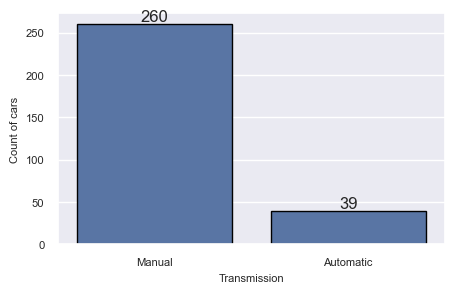

In [51]:
# Count of cars by Transmission
plt.figure(figsize = (5, 3))
ax=sns.countplot(data=df3, x=df3.Transmission, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel('Count of cars', size=8)
plt.yticks(size=8)
plt.xlabel('Transmission', size=8)
plt.xticks(size=8)
plt.show()

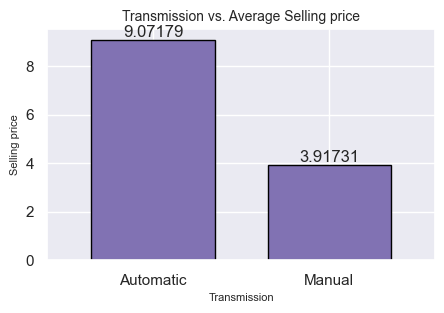

In [52]:
plt.figure(figsize = (5, 3))
a=df3.groupby('Transmission')['Selling_Price'].mean()
ax = a.plot.bar(ec='black', width=.7, color="m")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Transmission vs. Average Selling price', size=10)
plt.ylabel("Selling price", size=8)
plt.xlabel('Transmission', size=8)
plt.xticks(rotation=0)
plt.show()

# 📈Step 4) Training a Linear Regression Model

### 1) Data Preparation
- Choosing the features which we want to put in our model
- Categorical variables are converted to Numerical variables using **One Hot (Dummy encoding)**

🔸In Machine-learning activities, the data set may contain text or categorical values (basically non-numerical values), We need to convert them into Categorical variables for the smooth functioning of our Machine Learning Model. Algorithms usually work better with numerical inputs. So, the main challenge faced by Data scientists is to convert text/categorical data into numerical data and still make an algorithm/model to make sense of it.

As of now, Mainly Two methods are being used :
- **1) Label Encoder**
- **2) One Hot Encoder**

Both of these encoders are part of the SciKit-Learn library used in Python.

**Dummy encoding** also uses dummy (binary) variables. Instead of creating a number of dummy variables that is equal to the number of categories (k) in the variable, dummy encoding uses k-1 dummy variables.
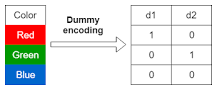

**1.1) Checking multicollinearity:**

In [53]:
# Due to the creation of high multicollinearity between 'Year' & 'Age' features, one of those should remove from the dataset.
df4 = df3.drop("Year", axis= 1)
df4.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


**1.2) Dummy encoding:**

In [54]:
df_num = df4.select_dtypes(exclude='object')
df_obj = df4.select_dtypes(include='object')

In [55]:
df_obj = pd.get_dummies(df_obj, drop_first=True)

In [56]:
Final_df = pd.concat([df_num, df_obj], axis=1)

In [57]:
Cars = Final_df

In [58]:
Cars.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,False,True,False,True
1,6,4.75,9.54,43000,0,True,False,False,True
2,2,7.25,9.85,6900,0,False,True,False,True
3,8,2.85,4.15,5200,0,False,True,False,True
4,5,4.60,6.87,42450,0,True,False,False,True


**1.3) Correlation (Target Vs. Features):**
- Correlation is a statistical term describing the degree to which two variables move in coordination with one another. If the two variables move in the same direction, then those variables are said to have a positive correlation. If they move in opposite directions, then they have a negative correlation.

In [59]:
# Age = -0.234
Comp1 = np.corrcoef(Cars.Age, Cars.Selling_Price)
Comp1

array([[ 1.       , -0.2343694],
       [-0.2343694,  1.       ]])

In [60]:
# Present_Price = 0.876
Comp2 = np.corrcoef(Cars.Present_Price, Cars.Selling_Price)
Comp2

array([[1.        , 0.87637818],
       [0.87637818, 1.        ]])

In [61]:
# Kms_Driven = 0.028
Comp3 = np.corrcoef(Cars.Kms_Driven, Cars.Selling_Price)
Comp3

array([[1.        , 0.02856559],
       [0.02856559, 1.        ]])

In [62]:
# Owner = -0.087
Comp4 = np.corrcoef(Cars.Owner, Cars.Selling_Price)
Comp4

array([[ 1.        , -0.08788045],
       [-0.08788045,  1.        ]])

In [63]:
# Diesel = 0.543
Comp5 = np.corrcoef(Cars.Fuel_Type_Diesel, Cars.Selling_Price)
Comp5

array([[1.        , 0.54354059],
       [0.54354059, 1.        ]])

In [64]:
# Petrol = -0.531
Comp6 = np.corrcoef(Cars.Fuel_Type_Petrol, Cars.Selling_Price)
Comp6

array([[ 1.        , -0.53163623],
       [-0.53163623,  1.        ]])

In [65]:
# Individual = -0.553
Comp7 = np.corrcoef(Cars.Seller_Type_Individual, Cars.Selling_Price)
Comp7

array([[ 1.        , -0.55385062],
       [-0.55385062,  1.        ]])

In [66]:
# Manual = -0.348
Comp8 = np.corrcoef(Cars.Transmission_Manual, Cars.Selling_Price)
Comp8

array([[ 1.        , -0.34886853],
       [-0.34886853,  1.        ]])

###### 🚀Correlation results:
**Present_Price = 0.876 > Individual = -0.553 > Diesel = 0.543 > Petrol = -0.531 > Manual = -0.348 > Age = -0.234 > Owner = -0.087 > Kms_Driven = 0.028**

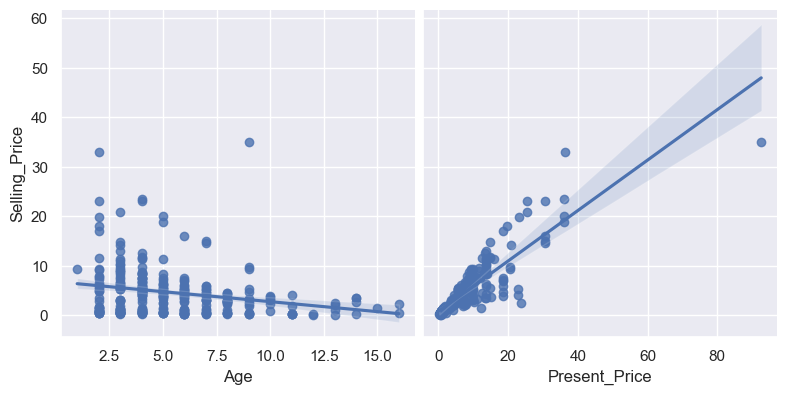

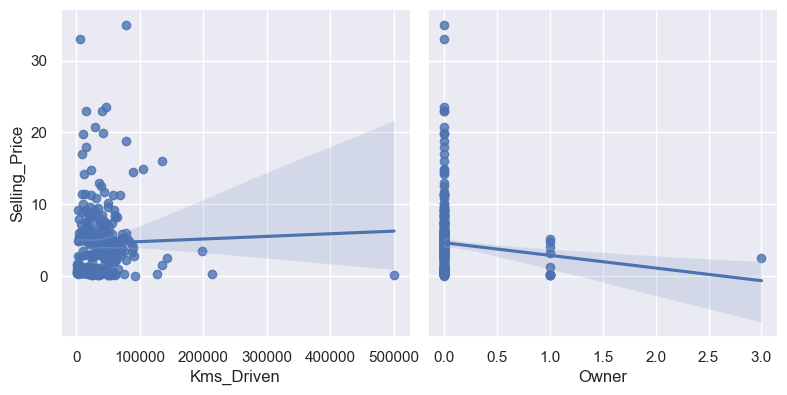

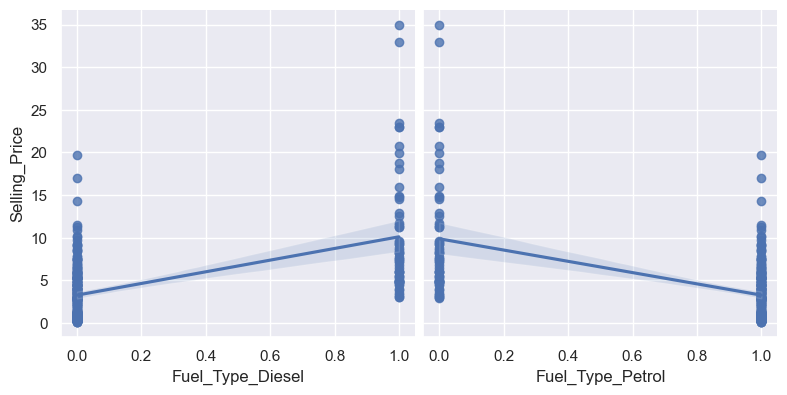

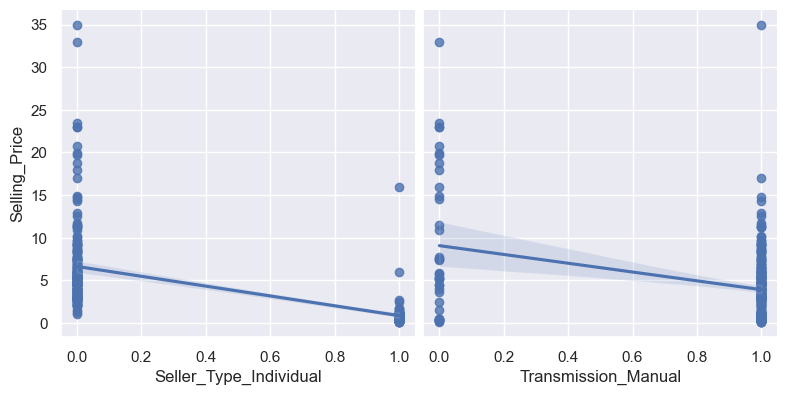

In [67]:
def p(x,y):
    sns.pairplot(Cars, x_vars=[x,y], y_vars='Selling_Price',size=4, aspect=1, kind='reg')
    plt.show()

p('Age', 'Present_Price')
p('Kms_Driven', 'Owner')
p('Fuel_Type_Diesel', 'Fuel_Type_Petrol')
p('Seller_Type_Individual', 'Transmission_Manual')

- Here, we are plotting our target variable with eight independent variables. It's pretty apparent from the chart that there is a better linear relationship between the Selling Price and Present Price than the relationship of other variables with the target (Selling price).

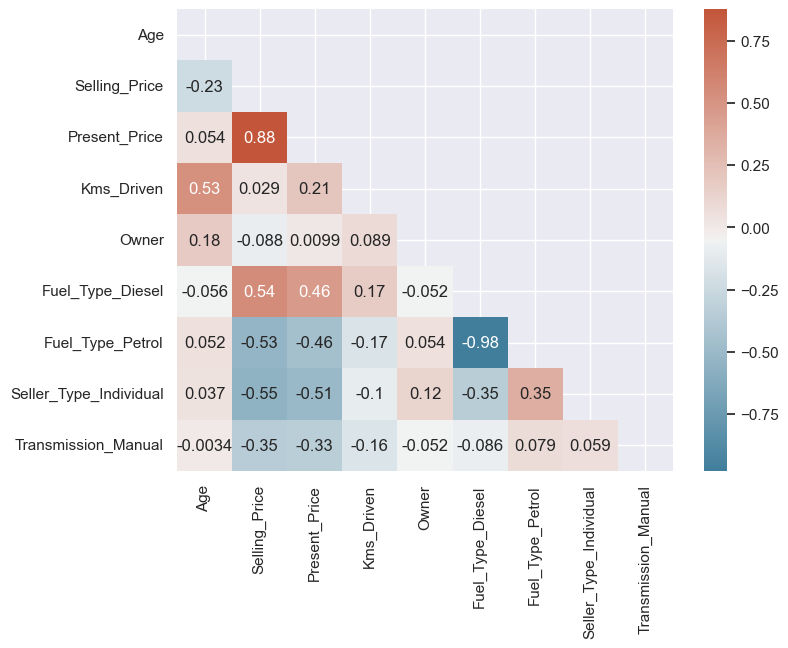

In [68]:
plt.subplots(figsize=(8, 6))
corr = Cars.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap)
plt.show()

## 🟢Model 1

In [69]:
Cars.shape

(299, 9)

### 2) X and y arrays

In [70]:
X = Cars.drop('Selling_Price', axis=1)
y = Cars['Selling_Price'].values.reshape(-1,1)

In [71]:
print("X=",X.shape,"\ny=", y.shape)

X= (299, 8) 
y= (299, 1)


### 3) Train Test Split
- We will train the model on the training set and then use the test set to evaluate the model.
- The **test size** was considered **0.25** in all three Models.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [73]:
print("X_train=",X_train.shape,"\nx_test=", X_test.shape)

X_train= (224, 8) 
x_test= (75, 8)


### 4) Linear Regression

In [74]:
#Calling the Linear Regression Algorithm
model = LinearRegression()

In [75]:
#fitting x_train, y_train
model.fit(X_train, y_train)

LinearRegression()

In [76]:
result = model.score(X_test, y_test)
print('Score:', result)

Score: 0.8089626228859107


# ▶️Model Evaluation

## Cross-validation

#### What is cross-validation?
In **cross-validation**, we run our modeling process on different subsets of the data to get multiple measures of model quality.

#### When should you use cross-validation?
Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

So, given these tradeoffs, when should you use each approach?

- For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
- For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.


In [77]:
# Importing libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [78]:
model_new = LinearRegression()

In [79]:
# number of splits after assessing (Comparing n_splits > 5) = 7
kfold_validation = KFold(7, shuffle=True, random_state=0)

In [80]:
results = cross_val_score (model_new, X, y, cv=kfold_validation)

In [81]:
print ('Results=', results)
print ('Mean=' ,np.mean(results))

Results= [0.75198494 0.83654101 0.80269692 0.895501   0.86381484 0.81506587
 0.82209575]
Mean= 0.8268143329151998


- All folds have desirable scores.

# ▶️Scaling

- **This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1.**

In [82]:
# Importing the required library
from sklearn import preprocessing

#### 1) MinMaxScaler
- Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

In [83]:
# MinMaxScaler
Scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
Norm1 = Scaler.fit_transform (Cars)
Norm1_Cars = pd.DataFrame (Norm1, columns=['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'])

In [84]:
Norm1_Cars.describe()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.292308,0.128643,0.078251,0.072906,0.014493,0.193980,0.799331,0.354515,0.869565
std,0.193125,0.142815,0.092847,0.078108,0.082907,0.396076,0.401172,0.479168,0.337346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133333,0.021490,0.009536,0.029029,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.266667,0.097708,0.062635,0.063063,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.400000,0.169054,0.103164,0.096864,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


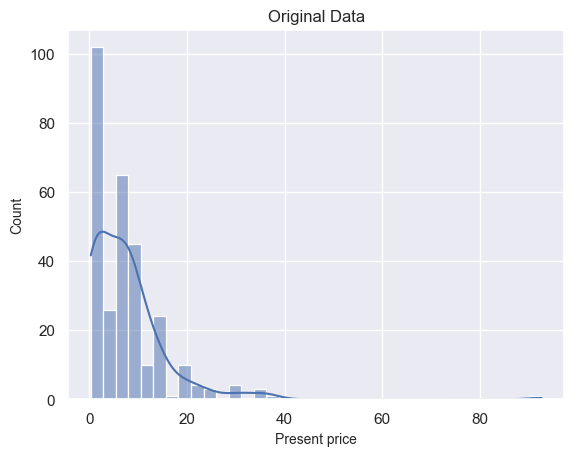

In [85]:
# plot both (Original & Scaled data) together to compare
# 1) Original data
sns.histplot(Cars.Present_Price, kde=True, legend=False)
plt.title("Original Data", size=12)
plt.xlabel("Present price", size=10)
plt.ylabel('Count', size=10)
plt.show()

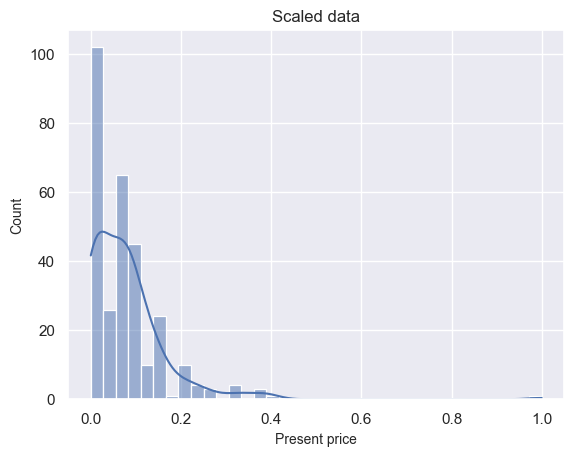

In [86]:
# 2) Scaled data
sns.histplot(Norm1_Cars.Present_Price, kde=True, legend=False)
plt.title("Scaled data", size=12)
plt.xlabel("Present price", size=10)
plt.ylabel('Count', size=10)
plt.show()

**Min & Max** for all features fitted within **0-1**

#### 2) StandardScaler
- StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.

In [87]:
# StandardScaler
Scaler_2 = preprocessing.StandardScaler()
Norm2 = Scaler_2.fit_transform (Cars)
Norm2_Cars = pd.DataFrame (Norm2, columns=['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'])

In [88]:
Norm2_Cars.describe()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,-1.128789e-16,-1.188199e-17,4.752794e-17,-4.158695e-17,0.000000,-1.188199e-17,-1.188199e-16,7.129191e-17,5.346893e-17
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.516109e+00,-9.022758e-01,-8.442155e-01,-9.349646e-01,-0.175101,-4.905751e-01,-1.995829e+00,-7.410957e-01,-2.581989e+00
25%,-8.245502e-01,-7.515492e-01,-7.413342e-01,-5.626912e-01,-0.175101,-4.905751e-01,5.010449e-01,-7.410957e-01,3.872983e-01
50%,-1.329920e-01,-2.169723e-01,-1.684724e-01,-1.262328e-01,-0.175101,-4.905751e-01,5.010449e-01,-7.410957e-01,3.872983e-01
75%,5.585663e-01,2.834399e-01,2.687731e-01,3.072346e-01,-0.175101,-4.905751e-01,5.010449e-01,1.349353e+00,3.872983e-01
max,3.670579e+00,6.111534e+00,9.944291e+00,1.188921e+01,11.906871,2.038424e+00,5.010449e-01,1.349353e+00,3.872983e-01


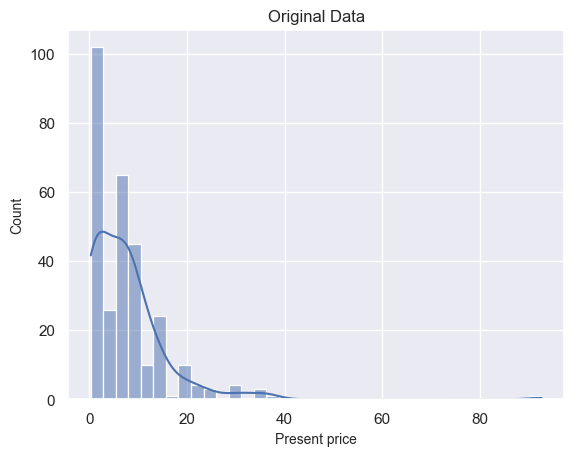

In [89]:
# plot both (Original & Scaled data) together to compare
# 1) Original data
sns.histplot(Cars.Present_Price, kde=True, legend=False)
plt.title("Original Data", size=12)
plt.xlabel("Present price", size=10)
plt.ylabel('Count', size=10)
plt.show()

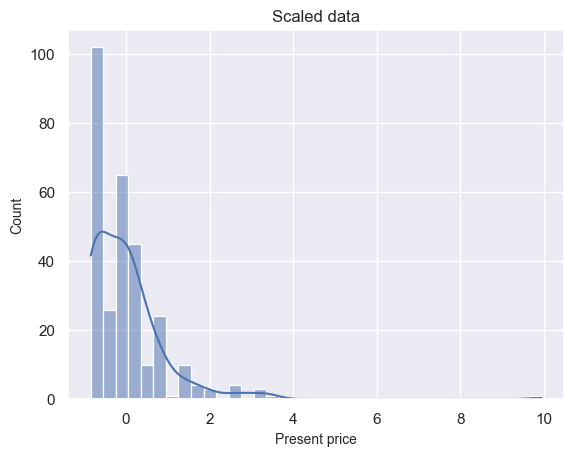

In [90]:
# 2) Scaled data
sns.histplot(Norm2_Cars.Present_Price, kde=True, legend=False)
plt.title("Scaled data", size=12)
plt.xlabel("Present price", size=10)
plt.ylabel('Count', size=10)
plt.show()

 ### 5) Output of trained data (y-predict)

In [91]:
y_pred = model.predict(X_test)

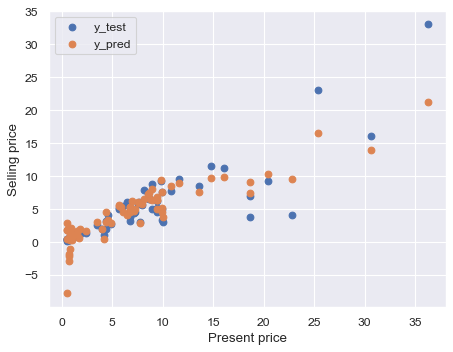

In [92]:
# Plotting terget-Present price
a = X_test.Present_Price
b = y_test

c = X_test.Present_Price
d = y_pred

plt.figure(dpi= 80)
plt.scatter(a, b)
plt.scatter(c, d)
plt.legend(["y_test", "y_pred"])
plt.xlabel("Present price")
plt.ylabel("Selling price")
plt.show()

In [93]:
X_test.insert(8, "y_test", y_test)
X_test.insert(9, "y_pred", y_pred)

In [94]:
X_test.head()

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,y_test,y_pred
208,2,8.10,3435,0,False,True,False,True,7.9,6.495591
190,11,0.75,60000,0,False,True,True,True,0.2,-1.840845
12,4,9.94,15000,0,False,True,False,False,7.5,7.568134
221,6,6.79,32000,0,False,True,False,False,4.5,5.341598
239,7,4.43,23709,0,False,True,False,True,2.0,3.052327


In [95]:
# Sorted by Age
Cars_Age = X_test.sort_values(by=["Age"])

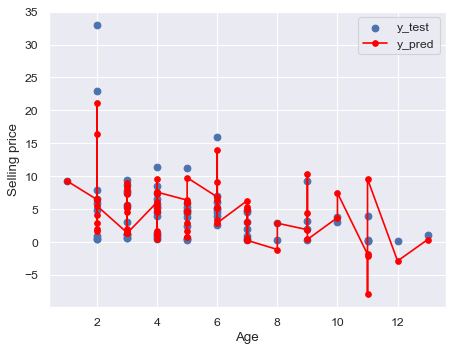

In [96]:
#Plotting terget-Age (Sorted by Age)
a = Cars_Age.Age
b = Cars_Age.y_test

c = Cars_Age.Age
d = Cars_Age.y_pred

plt.figure(dpi= 80)
plt.scatter(a, b)
plt.plot(c, d, color="red", marker = 'o', ms=5)
plt.legend(["y_test", "y_pred"])
plt.xlabel("Age")
plt.ylabel("Selling price")
plt.show()

In [97]:
# Sorted by Present price
Cars_Present_Price = X_test.sort_values(by=["Present_Price"])

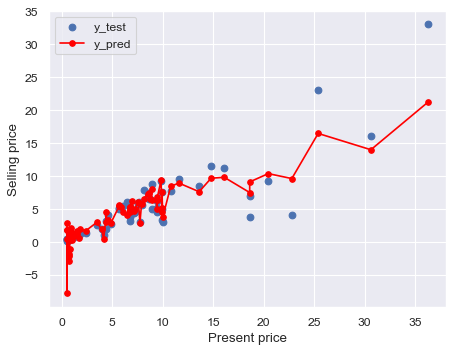

In [98]:
# Plotting terget-Present price (Sorted by Present price)
a = Cars_Present_Price.Present_Price
b = Cars_Present_Price.y_test

c = Cars_Present_Price.Present_Price
d = Cars_Present_Price.y_pred

plt.figure(dpi= 80)
plt.scatter(a, b)
plt.plot(c, d, color="red", marker = 'o', ms=5)
plt.legend(["y_test", "y_pred"])
plt.xlabel("Present price")
plt.ylabel("Selling price")
plt.show()

In [99]:
# Sorted by Kms Driven
Cars_Kms_Driven = X_test.sort_values(by=["Kms_Driven"])

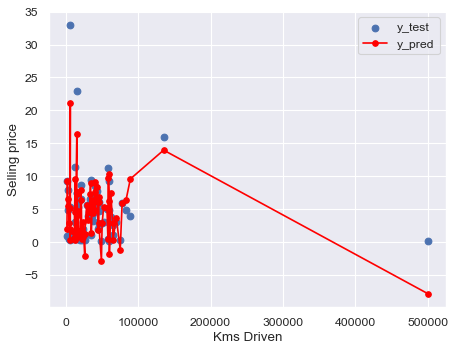

In [100]:
# Plotting terget-Kms Driven (Sorted by Kms Driven)
a = Cars_Kms_Driven.Kms_Driven
b = Cars_Kms_Driven.y_test

c = Cars_Kms_Driven.Kms_Driven
d = Cars_Kms_Driven.y_pred

plt.figure(dpi= 80)
plt.scatter(a, b)
plt.plot(c, d, color="red", marker = 'o', ms=5)
plt.legend(["y_test", "y_pred"])
plt.xlabel("Kms Driven")
plt.ylabel("Selling price")
plt.show()

### ✔️Intercept and Coefficient

In [101]:
print ("Initial model:")
print('Intercept:',model.intercept_)
print('Coefficients:',model.coef_)

Initial model:
Intercept: [4.04306038]
Coefficients: [[-3.15282470e-01  4.21041908e-01 -1.58640880e-05 -8.77336545e-01
   2.57750944e+00  8.39008233e-01 -1.50688363e+00 -1.11185869e+00]]


**Features:** ➡️ **X1**=Age, **X2**=Present_Price, **X3**=Kms_Driven, **X4**=Owner, **X5**=Fuel_Type_Diesel, **X6**=Fuel_Type_Petrol, **X7**=Seller_Type_Individual, **X8**=Transmission_Manual


**Linear regression equation:** 
**➡️ y** = 4.04306038 + (-3.15282470e-01 * X1) + (4.21041908e-01 * X2) + (-1.58640880e-05 * X3) + (-8.77336545e-01 * X4) + (2.57750944e+00 * X5) + (8.39008233e-01 * X6) + (-1.50688363e+00 * X7) + (-1.11185869e+00 * X8)

### 🧪Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

 - **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
$$
\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|
$$
 - **Mean Squared Error (MSE)** is the mean of the squared errors:
$$
\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2
$$
 - **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
$$
\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
$$

#### ⚖️Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [102]:
print ("Initial model metrics:")
print ("Initial model MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("Initial model MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("Initial model RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

Initial model metrics:
Initial model MAE: 1.2445078077947498
Initial model MSE: 4.982872010580199
Initial model RMSE: 2.2322347570495804


**-** **R2 score** (coefficient of determination) regression score function:

- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
- In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a  score of 0.0.

In [103]:
print ("Initial model R2 Score:", model.score (X_train, y_train)) 

Initial model R2 Score: 0.8977783408436153


In [104]:
print ("Initial model R2 Score:", metrics.r2_score (y_test, y_pred))

Initial model R2 Score: 0.8089626228859107


In [105]:
Actual_Predicted = pd.DataFrame({"Actual":y_test.flatten(), 'Predicted':y_pred.flatten()}) 
Actual_Predicted

,Actual,Predicted
0,7.90,6.495591
1,0.20,-1.840845
2,7.50,7.568134
3,4.50,5.341598
4,2.00,3.052327
...,...,...
70,0.48,1.723693
71,4.95,6.307682
72,5.30,4.795125
73,1.95,1.889165


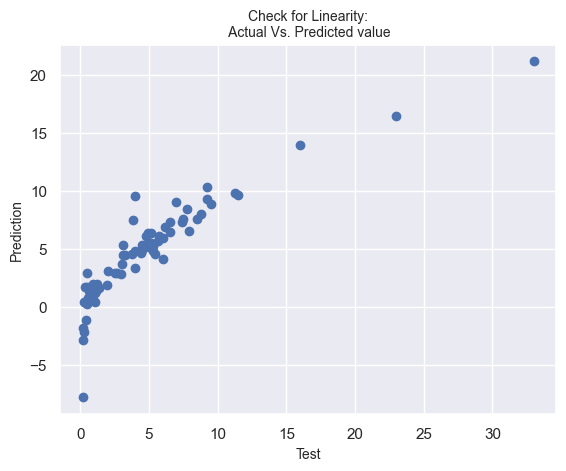

In [106]:
# Check for Linearity of Initial model
plt.scatter(y_test, y_pred)
plt.title('Check for Linearity:\n Actual Vs. Predicted value', size=10)
plt.xlabel("Test", size=10)
plt.ylabel("Prediction", size=10)
plt.show()

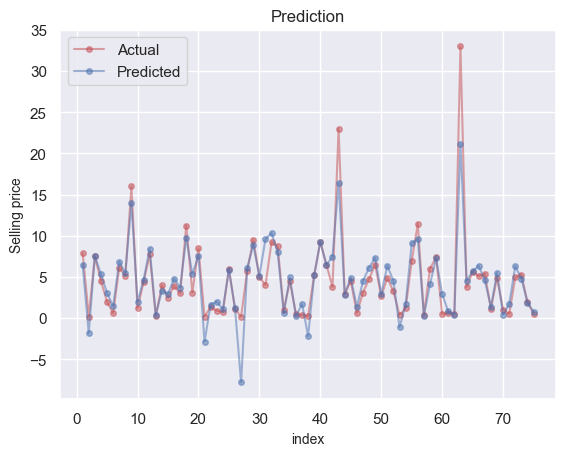

In [107]:
# Plotting the actual and predicted values
r = [i for i in range (1, len(y_test)+1, 1)]
plt.plot(r, y_test, color = 'r', marker = 'o', ms=4, alpha = 0.5, label = 'Actual')
plt.plot(r, y_pred, color = 'b', marker = 'o', ms=4, alpha = 0.5, label = 'Predicted')
plt.title('Prediction', size=12)
plt.xlabel('index', size=10)
plt.ylabel('Selling price', size=10)
plt.legend(loc = 'upper left')
plt.show()

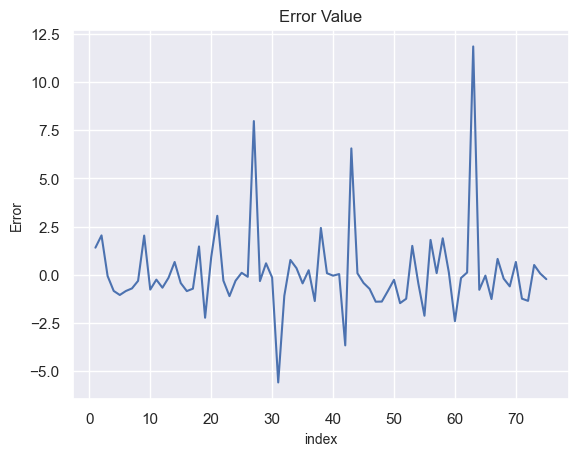

In [108]:
# Plotting the error
r = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(r, y_test-y_pred, linestyle='-')
plt.title('Error Value', size=12)
plt.xlabel('index', size=10)
plt.ylabel('Error', size=10)
plt.show()

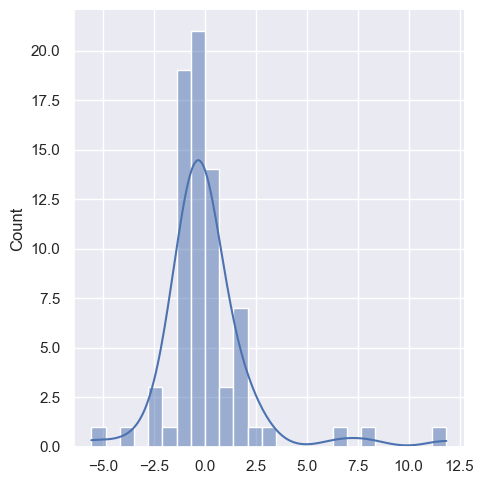

In [109]:
sns.displot(y_test-y_pred, bins=25, kde=True, legend=False)
plt.show()

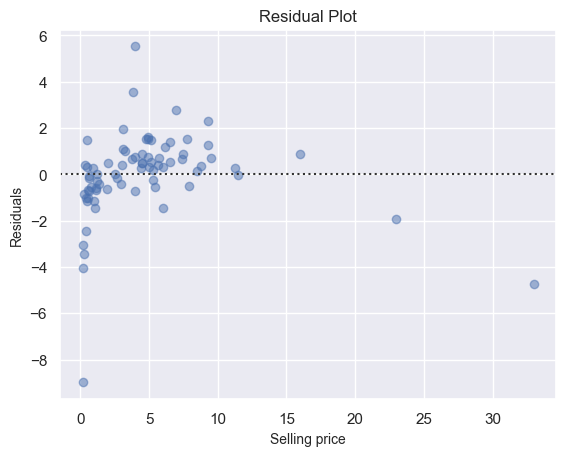

In [112]:
# Residuals
sns.residplot(data=None, x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.xlabel('Selling price', size=10)
plt.ylabel('Residuals', size=10)
plt.title('Residual Plot', size=12)
plt.show()

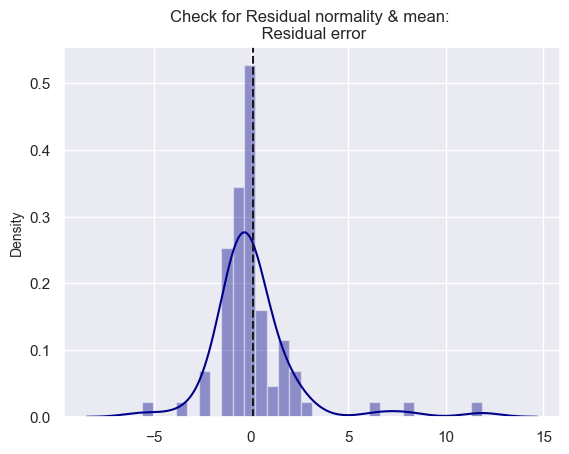

In [113]:
# Check for Residual normality & mean
sns.distplot((y_test - y_pred), color='darkblue')
plt.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
plt.title('Check for Residual normality & mean: \n Residual error', size=12);
plt.ylabel('Density', size=10 )
plt.show()

### ✅Evaluating metrics for normalized features

**1) MinMaxScaler**

In [115]:
Norm1_Cars.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.266667,0.093123,0.057109,0.053053,0.0,0.0,1.0,0.0,1.0
1,0.333333,0.133238,0.099913,0.085085,0.0,1.0,0.0,0.0,1.0
2,0.066667,0.204871,0.103273,0.012813,0.0,0.0,1.0,0.0,1.0
3,0.466667,0.078797,0.041504,0.009409,0.0,0.0,1.0,0.0,1.0
4,0.266667,0.128940,0.070980,0.083984,0.0,1.0,0.0,0.0,1.0


In [116]:
X = Norm1_Cars.drop('Selling_Price', axis=1)
y = Norm1_Cars['Selling_Price'].values.reshape(-1,1)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [118]:
#Calling the Linear Regression Algorithm
model_normalized = LinearRegression()

In [119]:
#fitting x_train, y_train
model_normalized.fit(X_train, y_train)

LinearRegression()

In [120]:
print('Intercept:',model_normalized.intercept_)
print('Coefficients:',model_normalized.coef_)

Intercept: [0.10758107]
Coefficients: [[-0.13550822  1.11328789 -0.22705192 -0.07541575  0.07385414  0.02404035
  -0.04317718 -0.03185842]]


In [121]:
y_pred = model_normalized.predict(X_test)

In [122]:
print ("Normalized model metrics:")
print ("Normalized model MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("Normalized model MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("Normalized model RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

Normalized model metrics:
Normalized model MAE: 0.03565924950703201
Normalized model MSE: 0.004090994335499105
Normalized model RMSE: 0.06396088129082576


In [123]:
print ("Normalized model R2 Score:", metrics.r2_score (y_test, y_pred))

Normalized model R2 Score: 0.80896262288587


**2) StandardScaler**

In [124]:
Norm2_Cars.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.132992,-0.249127,-0.228097,-0.254603,-0.175101,-0.490575,0.501045,-0.741096,0.387298
1,0.212787,0.032229,0.233700,0.156181,-0.175101,2.038424,-1.995829,-0.741096,0.387298
2,-1.170329,0.534651,0.269942,-0.770651,-0.175101,-0.490575,0.501045,-0.741096,0.387298
3,0.904345,-0.349612,-0.396448,-0.814297,-0.175101,-0.490575,0.501045,-0.741096,0.387298
4,-0.132992,0.002084,-0.078451,0.142061,-0.175101,2.038424,-1.995829,-0.741096,0.387298


In [125]:
X = Norm2_Cars.drop('Selling_Price', axis=1)
y = Norm2_Cars['Selling_Price'].values.reshape(-1,1)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [127]:
#Calling the Linear Regression Algorithm
model_normalized_2 = LinearRegression()

In [128]:
#fitting x_train, y_train
model_normalized_2.fit(X_train, y_train)

LinearRegression()

In [129]:
print('Intercept:',model_normalized_2.intercept_)
print('Coefficients:',model_normalized_2.coef_)

Intercept: [-0.0046958]
Coefficients: [[-0.18324392  0.72376924 -0.12417944 -0.04378024  0.20482367  0.06753022
  -0.14486673 -0.07525337]]


In [130]:
y_pred = model_normalized_2.predict(X_test)

In [131]:
print ("Normalized model metrics:")
print ("Normalized model MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("Normalized model MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("Normalized model RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

Normalized model metrics:
Normalized model MAE: 0.25010718582735125
Normalized model MSE: 0.201250431431355
Normalized model RMSE: 0.44860944197749003


In [132]:
print ("Normalized model R2 Score:", metrics.r2_score (y_test, y_pred))

Normalized model R2 Score: 0.80896262288587


**-** **Result of Normalization:**
- **Initial model** R2 Score: 0.808
- Normalized **(MinMaxScaler)** model R2 Score: 0.808
- Normalized **(StandardScaler)** model R2 Score: 0.808

# ▶️Improve model

## 👨‍💻Let's improve our model accuracy

**🔸Initial model (Model 1) independent variables:**
- **X1** = **Age**
- **X2** = **Present price**
- **X3** = **Kms Driven**
- **X4** = **Owner**
- **X5** = **Fuel_Type_Diesel**
- **X6** = **Fuel_Type_Petrol**
- **X7** = **Seller_Type_Individual**
- **X8** = **Transmission_Manual**

## 🟢Model 2

In [133]:
Cars.shape

(299, 9)

In [134]:
X = Cars.drop('Selling_Price', axis=1)
y = Cars['Selling_Price']

###  🏋️‍♀️Creating higher exponent of Features

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

Best degree 1 with RMSE 2.2322347570495804


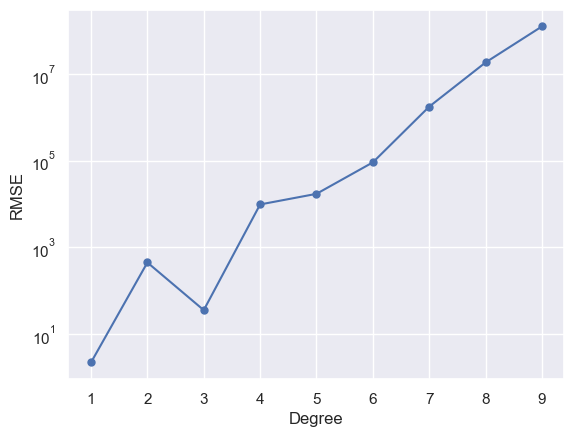

In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Best degree for RMSE
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses, marker = 'o', ms=5)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.show()

r2Score results:  [0.8089626228859107, -7747.027473365024, -48.31986522812073, -3676231.5966228577, -11328116.549509402, -319445808.75220776, -118448679262.5324, -12916877146389.338, -590028619697454.0]


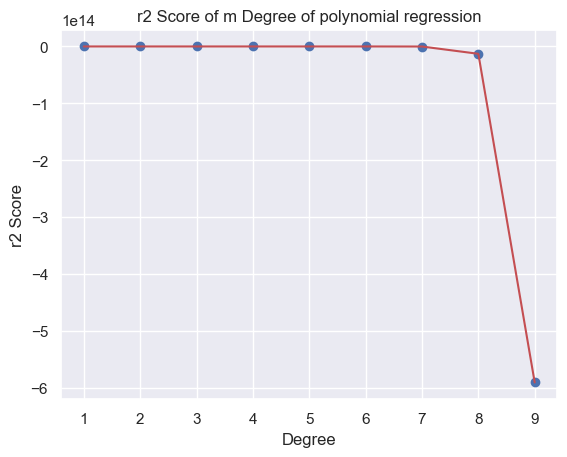

In [137]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

r2 = [] # Save r2 for different degrees
m = 1 # Start from 1-degree
m_max = 9 # Set the highest degree to be tested
while m <= m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train) # Train
    pre_y = model.predict(X_test) # Test
    r2.append(r2_score(y_test, pre_y.flatten())) # Calculate r2
    m = m + 1

print("r2Score results: ", r2)
# Plot
plt.plot([i for i in range(1, m_max + 1)], r2, 'r')
plt.scatter([i for i in range(1, m_max + 1)], r2)

#Descriptions

plt.title("r2 Score of m Degree of polynomial regression")
plt.xlabel("Degree")
plt.ylabel("r2 Score")
plt.show()

**❌The excessive complexity of the model in higher degrees caused the model to underfit.**

#### ✋To create an optimal model, we only add the higher degrees of features to the dataset which improve the model accuracy.

$$
(X1)^2 = (Age)^2
$$

In [138]:
Age2 = Cars.Age**2

$$
(X2)^7 = (Present price)^7
$$

In [139]:
Present_Price7 = Cars.Present_Price**7

$$
(X3)^2 = (Kms Driven)^2
$$

In [140]:
Kms_Driven2 = Cars.Kms_Driven**2

$$
(X4)^2 = (Owner)^2
$$

In [141]:
Owner2 = Cars.Owner**2

In [142]:
# Adding higher exponent of Features to the initial dataset
Cars.insert(1, 'Age2', Age2)
Cars.insert(4, 'Present_Price7', Present_Price7)
Cars.insert(6, 'Kms_Driven2', Kms_Driven2)
Cars.insert(8, 'Owner2', Owner2)

In [143]:
X = Cars.drop('Selling_Price', axis=1)
y = Cars['Selling_Price']

In [144]:
X

,Age,Age2,Present_Price,Present_Price7,Kms_Driven,Kms_Driven2,Owner,Owner2,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,25,5.59,1.705621e+05,27000,729000000,0,0,False,True,False,True
1,6,36,9.54,7.191817e+06,43000,1849000000,0,0,True,False,False,True
2,2,4,9.85,8.996086e+06,6900,47610000,0,0,False,True,False,True
3,8,64,4.15,2.120004e+04,5200,27040000,0,0,False,True,False,True
4,5,25,6.87,7.222660e+05,42450,1802002500,0,0,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
296,3,9,11.60,2.826220e+07,33988,1155184144,0,0,True,False,False,True
297,4,16,5.90,2.488651e+05,60000,3600000000,0,0,False,True,False,True
298,10,100,11.00,1.948717e+07,87934,7732388356,0,0,False,True,False,True
299,2,4,12.50,4.768372e+07,9000,81000000,0,0,True,False,False,True


In [145]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [147]:
regressor = LinearRegression()

In [148]:
regressor.fit(X_train, y_train)

LinearRegression()

In [149]:
print('Intercept:',regressor.intercept_)
print('Coefficients:',regressor.coef_)

Intercept: 3.685685135789665
Coefficients: [-6.50456874e-01  2.60981707e-02  5.45634986e-01 -2.61903741e-13
 -3.10899160e-05  7.39310329e-11  1.31473779e+00 -1.18470542e+00
  1.81141009e+00  2.98223651e-01 -7.43229474e-01 -1.81877529e-02]


In [150]:
pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])

,Coefficients
Age,-6.504569e-01
Age2,2.609817e-02
Present_Price,5.456350e-01
Present_Price7,-2.619037e-13
Kms_Driven,-3.108992e-05
Kms_Driven2,7.393103e-11
Owner,1.314738e+00
Owner2,-1.184705e+00
Fuel_Type_Diesel,1.811410e+00
Fuel_Type_Petrol,2.982237e-01


**Linear regression equation:** 
**➡️ y** = 3.6856786008127758 + (-6.50458145e-01 * Age) + (2.60982208e-02 * (Age^2)) + (5.45636493e-01 * Present_Price) + (-2.61904531e-13 * (Present_Price^7)) + (-3.10899059e-05 * Kms_Driven) + (7.39309745e-11 * (Kms_Driven^2)) + (1.31473779e+00 * Owner) + (-1.18470542e+00 * (Owner^2)) + (1.81141009e+00 * Diesel) + (2.98223651e-01 * Petrol) + (-7.43229474e-01 * Individual) + (-1.81877529e-02 * Manual)

In [151]:
y_pred = regressor.predict(X_test)

In [152]:
print ("Improved model metrics:")
print ("MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

Improved model metrics:
MAE: 1.1054807548229655
MSE: 3.32054399345202
RMSE: 1.8222359873111988


**Initial model metrics:**
- MAE: 1.2445078077950487
- MSE: 4.982872010578168
- RMSE: 2.2322347570491257

In [153]:
print ("Improved model R2 Score:", regressor.score (X_train, y_train)) 

Improved model R2 Score: 0.9207938897336244


In [154]:
print ("Improved model R2 Score:", metrics.r2_score (y_test, y_pred)) 

Improved model R2 Score: 0.8726942988392843


**Initial model R2Score:**
- 0.8089626228859885

Both the test and training data r2 scores increased together.

In [155]:
print('Improved accuracy =', ((0.8726946304570484 / 0.8089626228859885) - 1) * 100,'%')

Improved accuracy = 7.878238841702578 %


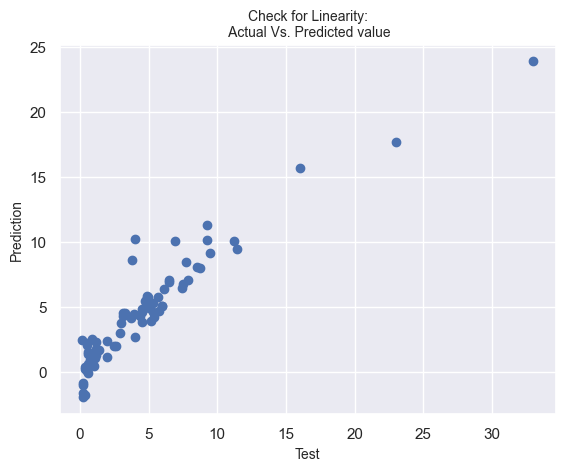

In [156]:
# Check for Linearity of improved model
plt.scatter(y_test, y_pred)
plt.title('Check for Linearity:\n Actual Vs. Predicted value', size=10)
plt.xlabel("Test", size=10)
plt.ylabel("Prediction", size=10)
plt.show()

- The **Linearity** of the model **improved** compared to the initial one.

### 🔸Linearity of the Initial model was:
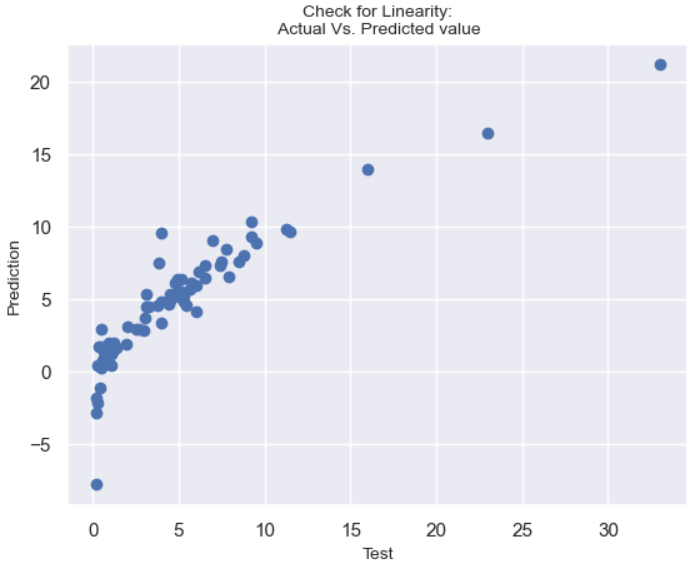

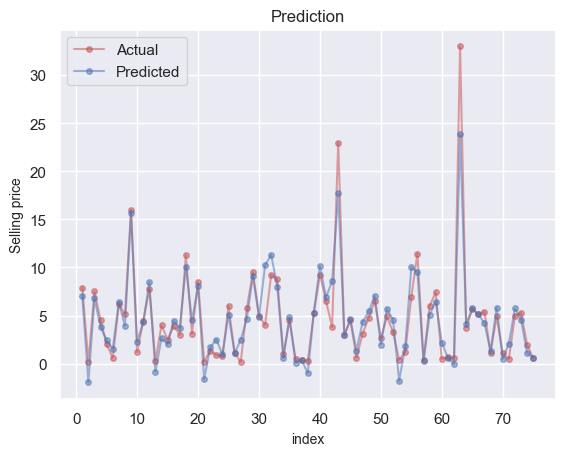

In [157]:
# Plotting the actual and predicted values
r = [i for i in range (1, len(y_test)+1, 1)]
plt.plot(r, y_test, color = 'r', marker = 'o', ms=4, alpha = 0.5, label = 'Actual')
plt.plot(r, y_pred, color = 'b', marker = 'o', ms=4, alpha = 0.5, label = 'Predicted')
plt.title('Prediction', size=12)
plt.xlabel('index', size=10)
plt.ylabel('Selling price', size=10)
plt.legend(loc = 'upper left')
plt.show()

In [158]:
actual_y_test = np.exp(y_test)
actual_predicted = np.exp(y_pred)
diff = abs(actual_y_test - actual_predicted)

compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Predicted Price' : actual_predicted, 'Difference' : diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(5)

,Test Data,Predicted Price,Difference
208,2697,1191,1505
190,1,0,1
12,1808,874,933
221,90,44,45
239,7,11,3


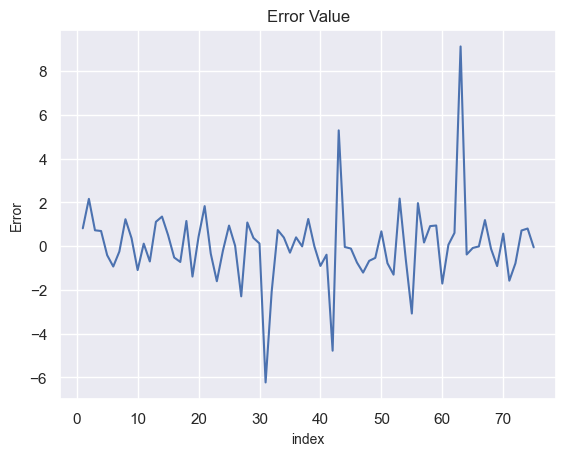

In [159]:
# Plotting the error
r = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(r, y_test-y_pred, linestyle='-')
plt.title('Error Value', size=12)
plt.xlabel('index', size=10)
plt.ylabel('Error', size=10)
plt.show()

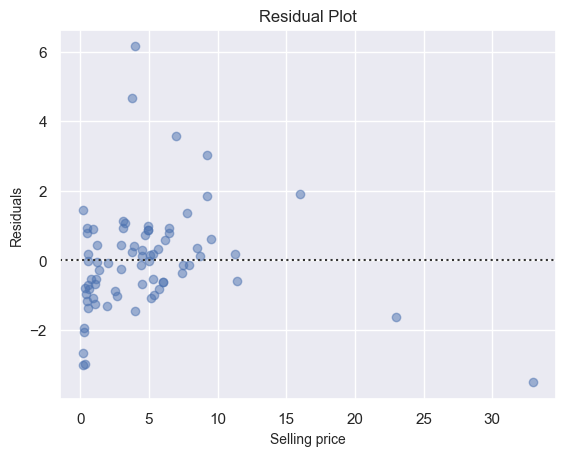

In [162]:
# Residuals
sns.residplot(data=None, x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.xlabel('Selling price', size=10) 
plt.ylabel('Residuals', size=10)
plt.title('Residual Plot', size=12)
plt.show()

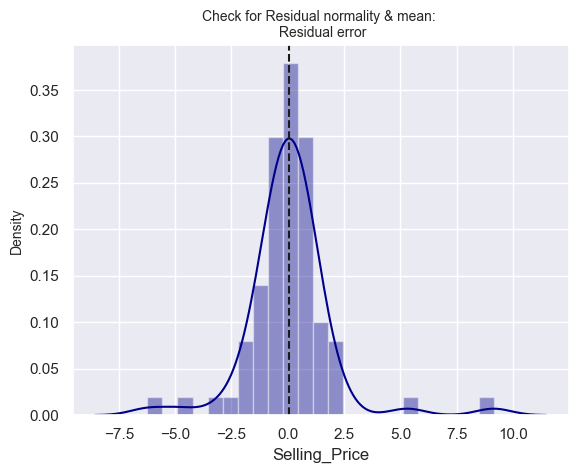

In [163]:
# Check for Residual normality & mean
sns.distplot((y_test - y_pred), color='darkblue')
plt.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
plt.title('Check for Residual normality & mean: \n Residual error', size=10);
plt.ylabel('Selling price', size=10 )
plt.ylabel('Density', size=10 )
plt.show()

## 💠Using K-Fold (Just for evaluation, not for improving the model's accuracy)

### K-Fold = 10

In [164]:
model_new = LinearRegression()
kfold_validation = KFold(10, shuffle=True, random_state=0)
results = cross_val_score (model_new, X, y, cv=kfold_validation)

In [165]:
print ('Results:', results)
print ('Mean:', np.mean(results))

Results: [ 8.39788555e-01  7.89848520e-01  8.91535912e-01  8.52501427e-01
  7.31451977e-01  9.39050877e-01 -3.26901505e+03  7.61569791e-01
  8.94312798e-01  7.33618968e-01]
Mean: -326.15813754485566


In [166]:
X.shape

(299, 12)

In [167]:
299/10

29.9

In [168]:
X_ = X[X.index<180]
X__ = X[X.index>210]

In [169]:
print(X_.shape,"\n", X__.shape)   

(178, 12) 
 (90, 12)


In [170]:
#Joining X_ & X__
X_f = pd.concat([X_, X__], axis=0)
X_f.shape

(268, 12)

In [171]:
y.shape

(299,)

In [172]:
y_ = y[y.index<180]
y__ = y[y.index>210]

In [173]:
print(y_.shape,"\n", y__.shape) 

(178,) 
 (90,)


In [174]:
#Joining y_ & y__
y_f = pd.concat([y_, y__], axis=0)
y_f.shape

(268,)

In [175]:
y_f = y_f.values.reshape(-1,1)
y_f.shape

(268, 1)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size = 0.25, random_state=0)

In [177]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [178]:
print ("MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

MAE: 1.176509590077868
MSE: 3.4327032538070488
RMSE: 1.8527555839362755


In [179]:
print ("R2 Score (K-Fold(10)):", metrics.r2_score (y_test, y_pred))

R2 Score (K-Fold(10)): 0.8516646325068359


In [180]:
print('Improved accuracy (K-Fold(10)):', ((0.8516647781481199 / 0.8089626228859885) - 1) * 100,'%')

Improved accuracy (K-Fold(10)): 5.278631429198888 %


### K-Fold = 7

In [181]:
model_new = LinearRegression()
kfold_validation = KFold(7, shuffle=True, random_state=0)
results = cross_val_score (model_new, X, y, cv=kfold_validation)

In [182]:
print ('Results:', results)
print ('Mean:', np.mean(results))

Results: [ 8.35214516e-01  8.85466054e-01  8.21229898e-01  9.01631965e-01
 -2.46067670e+03  8.17548139e-01  7.57783216e-01]
Mean: -350.8082602681514


In [183]:
X.shape

(299, 12)

In [184]:
299/7

42.714285714285715

In [185]:
X_ = X[X.index<170]
X__ = X[X.index>214]

In [186]:
print(X_.shape,"\n", X__.shape)           

(168, 12) 
 (86, 12)


In [187]:
#Joining X_ & X__
X_f = pd.concat([X_, X__], axis=0)
X_f.shape

(254, 12)

In [188]:
y.shape

(299,)

In [189]:
y_ = y[y.index<170]
y__ = y[y.index>214]

In [190]:
print(y_.shape,"\n", y__.shape) 

(168,) 
 (86,)


In [191]:
#Joining y_ & y__
y_f = pd.concat([y_, y__], axis=0)
y_f.shape

(254,)

In [192]:
y_f = y_f.values.reshape(-1,1)
y_f.shape

(254, 1)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size = 0.25, random_state=0)

In [194]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [195]:
print ("MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

MAE: 1.0247160222805216
MSE: 2.4210530334661775
RMSE: 1.5559733395743571


In [196]:
print ("R2 Score (K-Fold(7)):", metrics.r2_score (y_test, y_pred))

R2 Score (K-Fold(7)): 0.8880369741860339


In [197]:
print('Improved accuracy (K-Fold(7)):', ((0.8880369766543386 / 0.8089626228859885) - 1) * 100,'%')

Improved accuracy (K-Fold(7)): 9.774784585998653 %


#### Ⓜ️Model accuracy before using K-Fold was obtained: 0.87269
#### ▶️K-Fold(10) = 0.85166 accuracy       \       ▶️K-Fold(7) = 0.88803 accuracy
- **The model accuracy was increased by using K-Fold(7).** (45 indexes were removed)
- **In contrast, K-Fold(10) decreased the model accuracy compaired to the K-Fold(7).** (31 indexes were removed)
- **🔴K-fold is not appropriate for improving the model. It is used for a better accuracy report.**
- **🔴Therefore, in the continuation of the process, we ignore the effect of K-Fold on improving the accuracy of the model.**

##         🏎️*Predicting the Selling price of a car with features mentioned earlier in the description*🏎️

In [198]:
Cars.head()

,Age,Age2,Selling_Price,Present_Price,Present_Price7,Kms_Driven,Kms_Driven2,Owner,Owner2,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,25,3.35,5.59,1.705621e+05,27000,729000000,0,0,False,True,False,True
1,6,36,4.75,9.54,7.191817e+06,43000,1849000000,0,0,True,False,False,True
2,2,4,7.25,9.85,8.996086e+06,6900,47610000,0,0,False,True,False,True
3,8,64,2.85,4.15,2.120004e+04,5200,27040000,0,0,False,True,False,True
4,5,25,4.60,6.87,7.222660e+05,42450,1802002500,0,0,True,False,False,True


In [199]:
df_sample = pd.DataFrame({"Age":[10],
                          "Age2":[10**2],
                          "Selling_Price":[5], #hypothetical number
                          "Present_Price":[11.23],
                          "Present_Price7":[11.23**7],
                          "Kms_Driven":[42000],
                          "Kms_Driven2":[42000**2],
                          "Owner":[1],
                          "Owner2":[1**2],
                          "Fuel_Type_Diesel":[0],
                          "Fuel_Type_Petrol":[1],
                          "Seller_Type_Individual":[0],
                          "Transmission_Manual":[1]})
df_sample

,Age,Age2,Selling_Price,Present_Price,Present_Price7,Kms_Driven,Kms_Driven2,Owner,Owner2,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,10,100,5,11.23,2.252466e+07,42000,1764000000,1,1,0,1,0,1


In [200]:
#Joining Cars & df_sample
df_f = pd.concat([Cars,df_sample], axis=0)
df_f.reset_index(drop=True, inplace=True) 
df_f.tail()

,Age,Age2,Selling_Price,Present_Price,Present_Price7,Kms_Driven,Kms_Driven2,Owner,Owner2,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
295,4,16,4.00,5.90,2.488651e+05,60000,3600000000,0,0,0,1,0,1
296,10,100,3.35,11.00,1.948717e+07,87934,7732388356,0,0,0,1,0,1
297,2,4,11.50,12.50,4.768372e+07,9000,81000000,0,0,1,0,0,1
298,3,9,5.30,5.90,2.488651e+05,5464,29855296,0,0,0,1,0,1
299,10,100,5.00,11.23,2.252466e+07,42000,1764000000,1,1,0,1,0,1


In [201]:
df_f.shape

(300, 13)

In [202]:
train_sample= df_f.iloc[:299]
test_sample= df_f.iloc[299:]

In [203]:
X_train_sample= df_f[['Age', 'Age2', 'Present_Price', 'Present_Price7', 'Kms_Driven', 'Kms_Driven2', 'Owner', 'Owner2', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']][:299]
y_train_sample= df_f['Selling_Price'][:299].values.reshape(-1,1)

In [204]:
X_test_sample = df_f[['Age', 'Age2', 'Present_Price', 'Present_Price7', 'Kms_Driven', 'Kms_Driven2', 'Owner', 'Owner2', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']][299:]

In [205]:
sample = LinearRegression()

In [206]:
sample.fit(X_train_sample, y_train_sample)

LinearRegression()

In [207]:
y_pred = sample.predict(X_test_sample)
print('Predicted Selling-price:', y_pred*1000,'$$$')

Predicted Selling-price: [[5396.70426317]] $$$


#### ✅Checking the model performance with Linear Regression equation:

In [208]:
Age = 10
Present_Price = 11.23
Kms_Driven = 42000
Owner = 1
Diesel = 0
Petrol = 1
Seller_Type = 0
Transmission = 1

# Linear regression equation
y = (3.6856786008127758 + (-6.50458145e-01 * Age) + (2.60982208e-02 * (Age**2)) + (5.45636493e-01 * Present_Price) + (-2.61904531e-13 * (Present_Price**7)) + (-3.10899059e-05 * Kms_Driven) + (7.39309745e-11 * (Kms_Driven**2)) + (1.31473779e+00 * Owner) + (-1.18470542e+00 * (Owner**2)) + (1.81141009e+00 * Diesel) + (2.98223651e-01 * Petrol) + (-7.43229474e-01 * Seller_Type) + (-1.81877529e-02 * Transmission))
print('Predicted Selling-price:',y*1000,'$$$')

Predicted Selling-price: 5153.117607209588 $$$


**🆗By trying different independent variables, the effect of each feature weight on the target is quite evident, suggesting that the model 2 does an excellent job of predicting logical outcomes.**

## 🟢Model 3

### 🧩🧩Now, adding Interactions between the Features for better accuracy.

In [209]:
Cars.shape

(299, 13)

$$
(Present price) * (Age)
$$

In [210]:
Present_Price_Age = Cars.Present_Price * Cars.Age

$$
(Age) * (Kms Driven)
$$

In [211]:
Age_Kms_Driven = Cars.Age * Cars.Kms_Driven

$$
(Age) * (Owner)
$$

In [212]:
Age_Owner = Cars.Age * Cars.Owner

$$
(Present price) * (Age)^2
$$

In [213]:
Present_Price_Age2 = Cars.Present_Price * Age2

$$
(Age)^2 * (Kms Driven)
$$

In [214]:
Age2_Kms_Driven = Age2 * Cars.Kms_Driven

In [215]:
# Adding interactions between the Features to the dataset
Cars.insert(5, 'Present_Price_Age', Present_Price_Age)
Cars.insert(2, 'Age_Kms_Driven', Age_Kms_Driven)
Cars.insert(3, 'Age_Owner', Age_Owner)
Cars.insert(10, 'Present_Price_Age2', Present_Price_Age2)
Cars.insert(11, 'Age2_Kms_Driven', Age2_Kms_Driven)

In [216]:
Cars.shape

(299, 18)

In [217]:
X = Cars.drop('Selling_Price', axis=1)
y = Cars['Selling_Price']

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [219]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [220]:
print('Intercept:',regressor.intercept_)
print('Coefficients:',regressor.coef_)

Intercept: 0.17173849758577475
Coefficients: [ 1.19788147e-01 -3.26774170e-03  1.72544497e-06 -1.09281763e-01
  1.11764841e+00  1.60122765e-13 -1.47811313e-01 -1.60916281e-05
  2.88920850e-11  5.80060534e-03 -1.09101181e-07  2.37103759e-01
  2.26383686e-01  1.55478089e+00  3.02633798e-01 -5.17412619e-01
 -1.48602871e-01]


In [221]:
pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])

,Coefficients
Age,1.197881e-01
Age2,-3.267742e-03
Age_Kms_Driven,1.725445e-06
Age_Owner,-1.092818e-01
Present_Price,1.117648e+00
Present_Price7,1.601228e-13
Present_Price_Age,-1.478113e-01
Kms_Driven,-1.609163e-05
Kms_Driven2,2.889209e-11
Present_Price_Age2,5.800605e-03


In [222]:
y_pred = regressor.predict(X_test)

In [223]:
print ("MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

MAE: 0.5788319864419297
MSE: 0.6450822396101475
RMSE: 0.803170118723392


In [224]:
print ("Improved model R2 Score:", regressor.score (X_train, y_train)) 

Improved model R2 Score: 0.9805288858301205


In [225]:
print ("Improved model R2 Score:", metrics.r2_score (y_test, y_pred)) 

Improved model R2 Score: 0.9752683153778907


- The difference between the r2 scores of the test and training data obtained 0.005, which represents the **best fit** because by making the model more complex, the difference between the r2 scores of the test and training data increases.

In [226]:
print('Improved accuracy:', ((0.9752683145570787 / 0.8089626228859885) - 1) * 100,'% improved compared to the initial model (Model 1) accuracy')

Improved accuracy: 20.55789562659789 % improved compared to the initial model (Model 1) accuracy


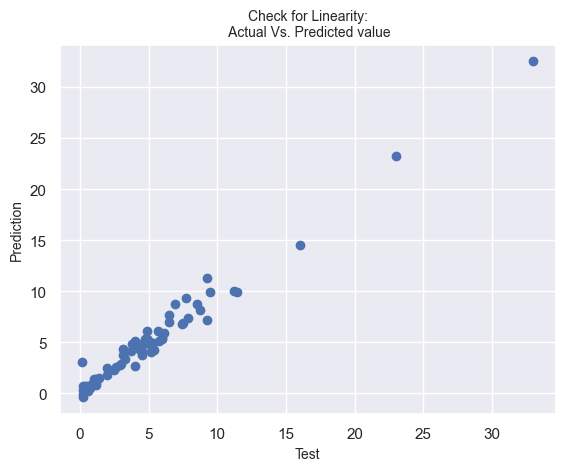

In [227]:
# Check for Linearity of Initial model
plt.scatter(y_test, y_pred)
plt.title('Check for Linearity:\n Actual Vs. Predicted value', size=10)
plt.xlabel("Test", size=10)
plt.ylabel("Prediction", size=10)
plt.show()

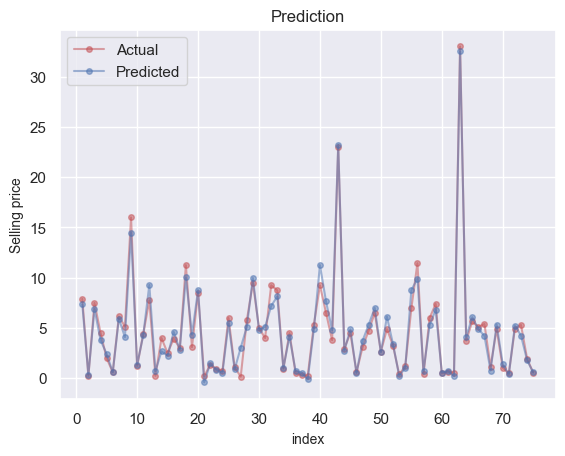

In [228]:
# Plotting the actual and predicted values
r = [i for i in range (1, len(y_test)+1, 1)]
plt.plot(r, y_test, color = 'r', marker = 'o', ms=4, alpha = 0.5, label = 'Actual')
plt.plot(r, y_pred, color = 'b', marker = 'o', ms=4, alpha = 0.5, label = 'Predicted')
plt.title('Prediction', size=12)
plt.xlabel('index', size=10)
plt.ylabel('Selling price', size=10)
plt.legend(loc = 'upper left')
plt.show()

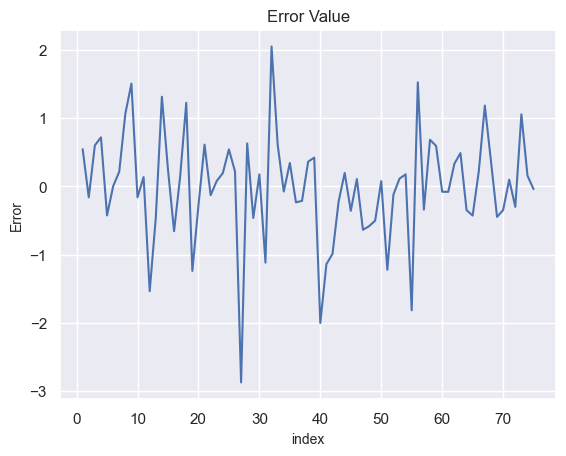

In [229]:
# Plotting the error
r = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(r, y_test-y_pred, linestyle='-')
plt.title('Error Value', size=12)
plt.xlabel('index', size=10)
plt.ylabel('Error', size=10)
plt.show()

# ▶️Conclusion

## 🧮Comparison of ''r2 scores'' train and test data in Model 1, Model 2 and Model 3:
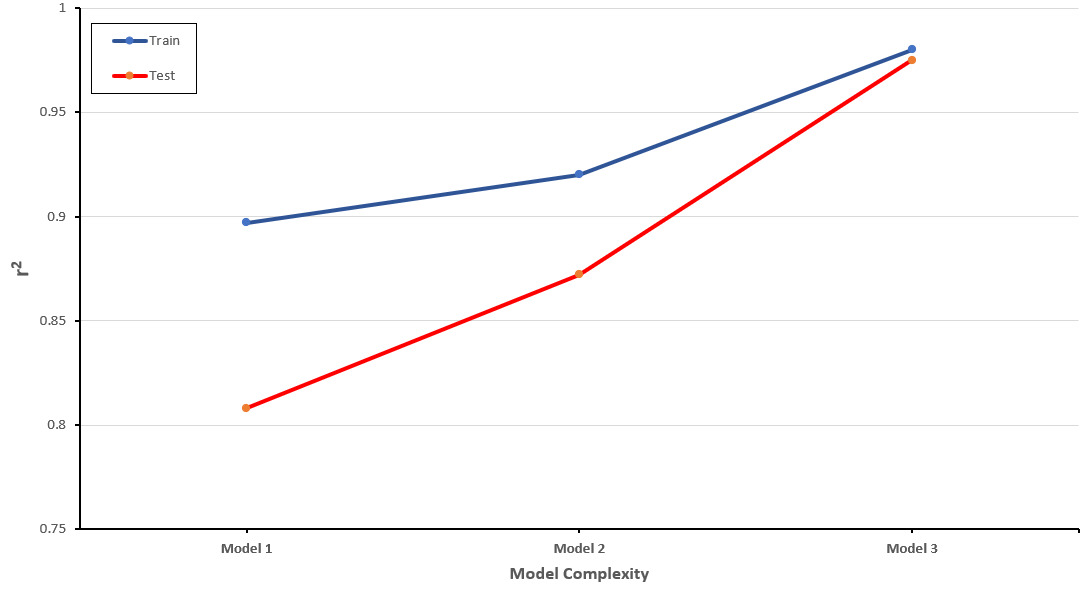

- **As the model becomes more complex from Model 1 to 3, the r2 scores distance between the train and test data is reduced.**

## Best Regards!